In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('studentdata.csv') 
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [5]:
df.shape

(30641, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [7]:
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [8]:
df['EthnicGroup'].value_counts()

group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
Name: EthnicGroup, dtype: int64

In [9]:
df['ParentEduc'].value_counts()

some college          6633
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: ParentEduc, dtype: int64

In [10]:
df['TestPrep'].value_counts()

none         18856
completed     9955
Name: TestPrep, dtype: int64

In [11]:
df['ParentMaritalStatus'].value_counts()

married     16844
single       7097
divorced     4919
widowed       591
Name: ParentMaritalStatus, dtype: int64

In [12]:
df['PracticeSport'].value_counts()

sometimes    15213
regularly    10793
never         4004
Name: PracticeSport, dtype: int64

In [13]:
df['IsFirstChild'].value_counts()

yes    19082
no     10655
Name: IsFirstChild, dtype: int64

In [14]:
df['TransportMeans'].value_counts()

school_bus    16145
private       11362
Name: TransportMeans, dtype: int64

In [15]:
df['WklyStudyHours'].value_counts()

5 - 10    16246
< 5        8238
> 10       5202
Name: WklyStudyHours, dtype: int64

In [16]:
dropna_cols=['EthnicGroup','ParentEduc','TestPrep','ParentMaritalStatus','PracticeSport','IsFirstChild','TransportMeans','WklyStudyHours']

In [17]:
df.dropna(subset=dropna_cols,inplace=True)

In [18]:
df.isnull().sum()

Gender                    0
EthnicGroup               0
ParentEduc                0
LunchType                 0
TestPrep                  0
ParentMaritalStatus       0
PracticeSport             0
IsFirstChild              0
NrSiblings             1023
TransportMeans            0
WklyStudyHours            0
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [19]:
df.shape

(20266, 14)

In [20]:
df['NrSiblings'].dtypes

dtype('float64')

In [21]:
df['NrSiblings'].mean()

2.1474822013199604

In [22]:
df.sample(8)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
16189,male,group E,some high school,standard,none,married,sometimes,yes,2.0,school_bus,< 5,82,70,72
25529,female,group C,some college,standard,none,married,sometimes,no,2.0,school_bus,> 10,58,66,66
25883,male,group B,master's degree,free/reduced,none,married,sometimes,yes,1.0,school_bus,< 5,68,76,72
5349,female,group E,master's degree,standard,none,married,sometimes,yes,1.0,school_bus,5 - 10,93,100,100
14804,male,group B,some college,free/reduced,completed,single,sometimes,no,3.0,school_bus,5 - 10,58,64,56
4241,female,group D,associate's degree,standard,none,married,regularly,yes,2.0,school_bus,5 - 10,96,100,96
26278,male,group B,some high school,free/reduced,completed,married,sometimes,yes,NaN,private,5 - 10,52,60,57
24762,female,group B,some high school,free/reduced,none,single,regularly,yes,0.0,school_bus,< 5,60,77,71


In [23]:
df['NrSiblings']=df['NrSiblings'].fillna(2.0)

In [24]:
df.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20266 entries, 2 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               20266 non-null  object 
 1   EthnicGroup          20266 non-null  object 
 2   ParentEduc           20266 non-null  object 
 3   LunchType            20266 non-null  object 
 4   TestPrep             20266 non-null  object 
 5   ParentMaritalStatus  20266 non-null  object 
 6   PracticeSport        20266 non-null  object 
 7   IsFirstChild         20266 non-null  object 
 8   NrSiblings           20266 non-null  float64
 9   TransportMeans       20266 non-null  object 
 10  WklyStudyHours       20266 non-null  object 
 11  MathScore            20266 non-null  int64  
 12  ReadingScore         20266 non-null  int64  
 13  WritingScore         20266 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 2.3+ MB


In [26]:
df.corr()

C:\Users\power\AppData\Local\Temp\ipykernel_7328\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,NrSiblings,MathScore,ReadingScore,WritingScore
NrSiblings,1.000000,0.003781,0.002351,0.003167
MathScore,0.003781,1.000000,0.818753,0.808485
ReadingScore,0.002351,0.818753,1.000000,0.952543
WritingScore,0.003167,0.808485,0.952543,1.000000


In [27]:
df_copy=df.copy()

C:\Users\power\AppData\Local\Temp\ipykernel_7328\2653415764.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  b=df.corr()


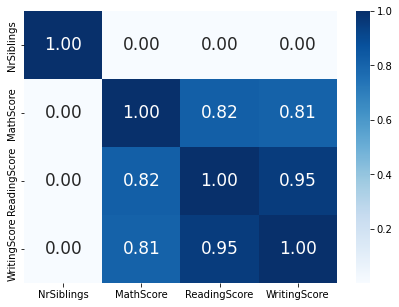

In [28]:
b=df.corr()
plt.figure(figsize=(7,5))
sns.heatmap(b,annot=True,annot_kws={'size':17},fmt='.2f',cmap='Blues')
plt.show()

In [29]:
for col in df.columns:
    if df[col].dtypes=='object':
        print(f'{col}:{df[col].unique()}')

Gender:['female' 'male']
EthnicGroup:['group B' 'group C' 'group D' 'group A' 'group E']
ParentEduc:["master's degree" 'some college' "associate's degree" 'high school'
 'some high school' "bachelor's degree"]
LunchType:['standard' 'free/reduced']
TestPrep:['none' 'completed']
ParentMaritalStatus:['single' 'married' 'widowed' 'divorced']
PracticeSport:['sometimes' 'regularly' 'never']
IsFirstChild:['yes' 'no']
TransportMeans:['school_bus' 'private']
WklyStudyHours:['< 5' '5 - 10' '> 10']


In [30]:
for col in df.columns:
    if df[col].dtypes=='object' and df[col].nunique()>2:
        print(f'{col}:{df[col].unique()}')

EthnicGroup:['group B' 'group C' 'group D' 'group A' 'group E']
ParentEduc:["master's degree" 'some college' "associate's degree" 'high school'
 'some high school' "bachelor's degree"]
ParentMaritalStatus:['single' 'married' 'widowed' 'divorced']
PracticeSport:['sometimes' 'regularly' 'never']
WklyStudyHours:['< 5' '5 - 10' '> 10']


In [31]:
cols1=['EthnicGroup','ParentEduc','ParentMaritalStatus','PracticeSport','WklyStudyHours']

In [32]:
df=pd.get_dummies(data=df,columns=cols1,drop_first=True)

In [33]:
df.head()

,Gender,LunchType,TestPrep,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,EthnicGroup_group B,...,ParentEduc_master's degree,ParentEduc_some college,ParentEduc_some high school,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_< 5,WklyStudyHours_> 10
2,female,standard,none,yes,4.0,school_bus,87,93,91,1,...,1,0,0,0,1,0,0,1,1,0
4,male,standard,none,yes,0.0,school_bus,76,78,75,0,...,0,1,0,1,0,0,0,1,0,0
5,female,standard,none,yes,1.0,school_bus,73,84,79,1,...,0,0,0,1,0,0,1,0,0,0
6,female,standard,completed,no,1.0,private,85,93,89,1,...,0,1,0,0,0,1,0,0,0,0
7,male,free/reduced,none,yes,1.0,private,41,43,39,1,...,0,1,0,1,0,0,0,1,0,1


In [34]:
df.shape

(20266, 25)

In [35]:
for col in df.columns:
    if df[col].dtypes=='object' and df[col].nunique()<3:
        print(f'{col}:{df[col].unique()}')

Gender:['female' 'male']
LunchType:['standard' 'free/reduced']
TestPrep:['none' 'completed']
IsFirstChild:['yes' 'no']
TransportMeans:['school_bus' 'private']


In [36]:
df['Gender']=df['Gender'].replace({'female':0,'male':1})
df['LunchType']=df['LunchType'].replace({'standard':0,'free/reduced':1})
df['TestPrep']=df['TestPrep'].replace({'none':0,'completed':1})
df['IsFirstChild']=df['IsFirstChild'].replace({'yes':0,'no':1})
df['TransportMeans']=df['TransportMeans'].replace({'school_bus':0,'private':1})

In [37]:
df.sample(4)

,Gender,LunchType,TestPrep,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,EthnicGroup_group B,...,ParentEduc_master's degree,ParentEduc_some college,ParentEduc_some high school,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_< 5,WklyStudyHours_> 10
2205,0,0,0,0,1.0,0,54,66,75,0,...,0,0,0,1,0,0,0,1,0,0
19768,1,0,0,0,1.0,0,45,54,52,0,...,0,0,0,0,1,0,0,0,0,0
25181,1,0,0,0,1.0,1,75,69,67,1,...,0,1,0,1,0,0,1,0,0,0
11986,0,0,0,0,4.0,1,60,69,70,0,...,0,0,0,0,0,0,1,0,1,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20266 entries, 2 to 30640
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        20266 non-null  int64  
 1   LunchType                     20266 non-null  int64  
 2   TestPrep                      20266 non-null  int64  
 3   IsFirstChild                  20266 non-null  int64  
 4   NrSiblings                    20266 non-null  float64
 5   TransportMeans                20266 non-null  int64  
 6   MathScore                     20266 non-null  int64  
 7   ReadingScore                  20266 non-null  int64  
 8   WritingScore                  20266 non-null  int64  
 9   EthnicGroup_group B           20266 non-null  uint8  
 10  EthnicGroup_group C           20266 non-null  uint8  
 11  EthnicGroup_group D           20266 non-null  uint8  
 12  EthnicGroup_group E           20266 non-null  uint8  
 13  P

In [39]:
df.corr()

,Gender,LunchType,TestPrep,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,EthnicGroup_group B,...,ParentEduc_master's degree,ParentEduc_some college,ParentEduc_some high school,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_< 5,WklyStudyHours_> 10
Gender,1.000000,0.000464,-0.008737,-0.005288,0.001371,-0.009059,0.157258,-0.243028,-0.293440,0.002870,...,0.002023,-0.003210,0.005055,0.023685,-0.010380,0.000071,-0.008648,0.005728,-0.003643,0.006691
LunchType,0.000464,1.000000,-0.002064,0.008181,0.000346,-0.001215,-0.373755,-0.262933,-0.279777,0.007513,...,0.009056,-0.014352,0.000702,-0.008358,0.012190,0.001909,0.006916,0.000906,-0.003196,-0.007007
TestPrep,-0.008737,-0.002064,1.000000,0.002265,-0.002854,0.016673,0.142044,0.212402,0.293847,0.006908,...,-0.006491,0.007164,0.000994,-0.000934,0.004127,-0.006281,-0.004084,0.007378,0.003260,-0.003896
IsFirstChild,-0.005288,0.008181,0.002265,1.000000,0.116594,-0.004373,-0.010478,-0.007939,-0.004119,-0.009725,...,-0.012102,0.008211,-0.009609,-0.004579,0.010476,-0.004428,-0.011991,0.007092,-0.001336,0.002434
NrSiblings,0.001371,0.000346,-0.002854,0.116594,1.000000,0.008530,0.003781,0.002351,0.003167,-0.002213,...,-0.008227,0.003059,-0.001187,-0.003290,-0.007593,0.004438,-0.011648,0.004354,-0.002595,0.004610
TransportMeans,-0.009059,-0.001215,0.016673,-0.004373,0.008530,1.000000,-0.002417,0.002844,0.003035,-0.009024,...,-0.004986,-0.002468,0.007064,-0.000282,-0.000336,0.000900,-0.000298,-0.003424,-0.017734,0.011610
MathScore,0.157258,-0.373755,0.142044,-0.010478,0.003781,-0.002417,1.000000,0.818753,0.808485,-0.100594,...,0.099825,-0.002998,-0.127776,0.004584,-0.009402,0.012314,0.050210,-0.012502,-0.084098,0.067409
ReadingScore,-0.243028,-0.262933,0.212402,-0.007939,0.002351,0.002844,0.818753,1.000000,0.952543,-0.074470,...,0.116755,-0.010456,-0.131338,-0.005272,-0.003258,0.010230,0.021837,-0.007208,-0.049506,0.032683
WritingScore,-0.293440,-0.279777,0.293847,-0.004119,0.003167,0.003035,0.808485,0.952543,1.000000,-0.085802,...,0.137090,0.000460,-0.154138,-0.008870,-0.000147,0.008773,0.050282,-0.020872,-0.053391,0.042772
EthnicGroup_group B,0.002870,0.007513,0.006908,-0.009725,-0.002213,-0.009024,-0.100594,-0.074470,-0.085802,1.000000,...,0.007816,-0.013072,0.004648,0.001892,0.009809,-0.004650,-0.006747,0.004662,-0.002715,-0.003106


In [40]:
cols2=['Gender','LunchType','TestPrep','IsFirstChild','NrSiblings','TransportMeans','MathScore','ReadingScore','WritingScore']

In [41]:
df2=df[cols2]
df2.head()

,Gender,LunchType,TestPrep,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore
2,0,0,0,0,4.0,0,87,93,91
4,1,0,0,0,0.0,0,76,78,75
5,0,0,0,0,1.0,0,73,84,79
6,0,0,1,1,1.0,1,85,93,89
7,1,1,0,0,1.0,1,41,43,39


In [42]:
df2.corr()

,Gender,LunchType,TestPrep,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore
Gender,1.000000,0.000464,-0.008737,-0.005288,0.001371,-0.009059,0.157258,-0.243028,-0.293440
LunchType,0.000464,1.000000,-0.002064,0.008181,0.000346,-0.001215,-0.373755,-0.262933,-0.279777
TestPrep,-0.008737,-0.002064,1.000000,0.002265,-0.002854,0.016673,0.142044,0.212402,0.293847
IsFirstChild,-0.005288,0.008181,0.002265,1.000000,0.116594,-0.004373,-0.010478,-0.007939,-0.004119
NrSiblings,0.001371,0.000346,-0.002854,0.116594,1.000000,0.008530,0.003781,0.002351,0.003167
TransportMeans,-0.009059,-0.001215,0.016673,-0.004373,0.008530,1.000000,-0.002417,0.002844,0.003035
MathScore,0.157258,-0.373755,0.142044,-0.010478,0.003781,-0.002417,1.000000,0.818753,0.808485
ReadingScore,-0.243028,-0.262933,0.212402,-0.007939,0.002351,0.002844,0.818753,1.000000,0.952543
WritingScore,-0.293440,-0.279777,0.293847,-0.004119,0.003167,0.003035,0.808485,0.952543,1.000000


In [43]:
df2.corr()['MathScore'].sort_values(ascending=False)

MathScore         1.000000
ReadingScore      0.818753
WritingScore      0.808485
Gender            0.157258
TestPrep          0.142044
NrSiblings        0.003781
TransportMeans   -0.002417
IsFirstChild     -0.010478
LunchType        -0.373755
Name: MathScore, dtype: float64

In [44]:
df.corr()['MathScore'].sort_values(ascending=False)

MathScore                       1.000000
ReadingScore                    0.818753
WritingScore                    0.808485
EthnicGroup_group E             0.227607
Gender                          0.157258
TestPrep                        0.142044
ParentEduc_master's degree      0.099825
ParentEduc_bachelor's degree    0.095464
WklyStudyHours_> 10             0.067409
PracticeSport_regularly         0.050210
EthnicGroup_group D             0.044349
ParentMaritalStatus_widowed     0.012314
ParentMaritalStatus_married     0.004584
NrSiblings                      0.003781
TransportMeans                 -0.002417
ParentEduc_some college        -0.002998
ParentMaritalStatus_single     -0.009402
IsFirstChild                   -0.010478
PracticeSport_sometimes        -0.012502
ParentEduc_high school         -0.072361
WklyStudyHours_< 5             -0.084098
EthnicGroup_group C            -0.086320
EthnicGroup_group B            -0.100594
ParentEduc_some high school    -0.127776
LunchType       

In [45]:
df2.corr()['ReadingScore'].sort_values(ascending=False)

ReadingScore      1.000000
WritingScore      0.952543
MathScore         0.818753
TestPrep          0.212402
TransportMeans    0.002844
NrSiblings        0.002351
IsFirstChild     -0.007939
Gender           -0.243028
LunchType        -0.262933
Name: ReadingScore, dtype: float64

In [46]:
df.corr()['ReadingScore'].sort_values(ascending=False)

ReadingScore                    1.000000
WritingScore                    0.952543
MathScore                       0.818753
TestPrep                        0.212402
EthnicGroup_group E             0.133448
ParentEduc_master's degree      0.116755
ParentEduc_bachelor's degree    0.096340
EthnicGroup_group D             0.041609
WklyStudyHours_> 10             0.032683
PracticeSport_regularly         0.021837
ParentMaritalStatus_widowed     0.010230
TransportMeans                  0.002844
NrSiblings                      0.002351
ParentMaritalStatus_single     -0.003258
ParentMaritalStatus_married    -0.005272
PracticeSport_sometimes        -0.007208
IsFirstChild                   -0.007939
ParentEduc_some college        -0.010456
EthnicGroup_group C            -0.043335
WklyStudyHours_< 5             -0.049506
ParentEduc_high school         -0.072194
EthnicGroup_group B            -0.074470
ParentEduc_some high school    -0.131338
Gender                         -0.243028
LunchType       

In [47]:
df2.corr()['WritingScore'].sort_values(ascending=False)

WritingScore      1.000000
ReadingScore      0.952543
MathScore         0.808485
TestPrep          0.293847
NrSiblings        0.003167
TransportMeans    0.003035
IsFirstChild     -0.004119
LunchType        -0.279777
Gender           -0.293440
Name: WritingScore, dtype: float64

In [48]:
df.corr()['WritingScore'].sort_values(ascending=False)

WritingScore                    1.000000
ReadingScore                    0.952543
MathScore                       0.808485
TestPrep                        0.293847
ParentEduc_master's degree      0.137090
ParentEduc_bachelor's degree    0.122008
EthnicGroup_group E             0.111752
EthnicGroup_group D             0.095689
PracticeSport_regularly         0.050282
WklyStudyHours_> 10             0.042772
ParentMaritalStatus_widowed     0.008773
NrSiblings                      0.003167
TransportMeans                  0.003035
ParentEduc_some college         0.000460
ParentMaritalStatus_single     -0.000147
IsFirstChild                   -0.004119
ParentMaritalStatus_married    -0.008870
PracticeSport_sometimes        -0.020872
WklyStudyHours_< 5             -0.053391
EthnicGroup_group C            -0.062291
EthnicGroup_group B            -0.085802
ParentEduc_high school         -0.096819
ParentEduc_some high school    -0.154138
LunchType                      -0.279777
Gender          

In [49]:
df.describe()

,Gender,LunchType,TestPrep,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,EthnicGroup_group B,...,ParentEduc_master's degree,ParentEduc_some college,ParentEduc_some high school,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_< 5,WklyStudyHours_> 10
count,20266.000000,20266.000000,20266.000000,20266.000000,20266.000000,20266.000000,20266.000000,20266.000000,20266.000000,20266.000000,...,20266.000000,20266.000000,20266.000000,20266.000000,20266.000000,20266.000000,20266.000000,20266.000000,20266.000000,20266.000000
mean,0.492056,0.352462,0.346985,0.356163,2.140038,0.414783,66.614922,69.514507,68.573720,0.203099,...,0.069673,0.228807,0.190023,0.572733,0.239761,0.019244,0.359913,0.506316,0.279137,0.175812
std,0.499949,0.477749,0.476023,0.478876,1.407193,0.492697,15.376747,14.793358,15.486544,0.402315,...,0.254602,0.420075,0.392329,0.494694,0.426948,0.137385,0.479987,0.499972,0.448586,0.380669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,56.000000,59.000000,58.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,67.000000,70.000000,69.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,78.000000,80.000000,80.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,100.000000,100.000000,100.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


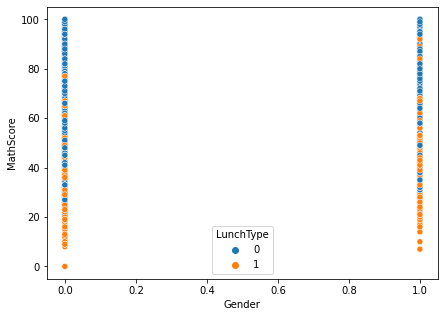

In [50]:
# Gender : female=0 , male=1
# LunchType : standard=0 , free/reduced=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Gender',y='MathScore',hue='LunchType')
plt.show()

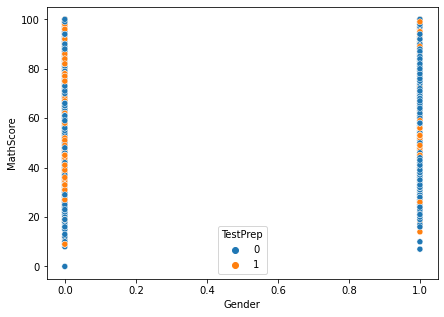

In [51]:
# Gender : female=0 , male=1
# TestPrep : none=0 , completed=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Gender',y='MathScore',hue='TestPrep')
plt.show()

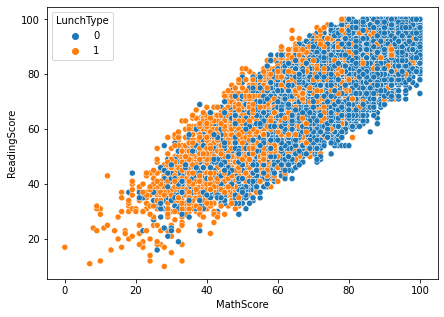

In [52]:
# LunchType : standard=0 , free/reduced=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='MathScore',y='ReadingScore',hue='LunchType')
plt.show()

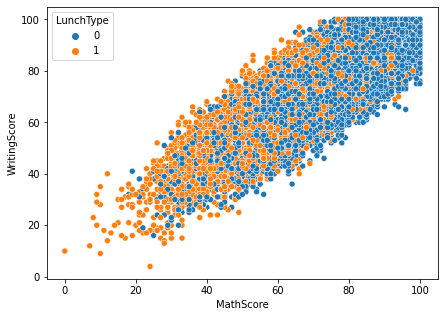

In [53]:
# LunchType : standard=0 , free/reduced=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='MathScore',y='WritingScore',hue='LunchType')
plt.show()

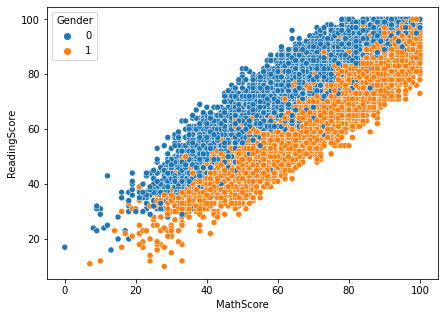

In [54]:
# Gender : female=0 , male=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='MathScore',y='ReadingScore',hue='Gender')
plt.show()

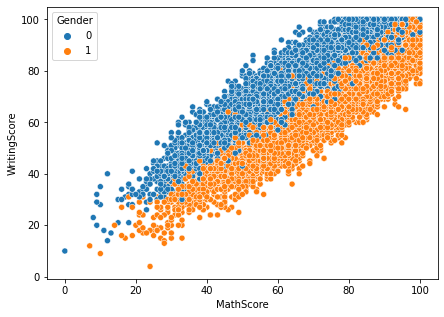

In [55]:
# Gender : female=0 , male=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='MathScore',y='WritingScore',hue='Gender')
plt.show()

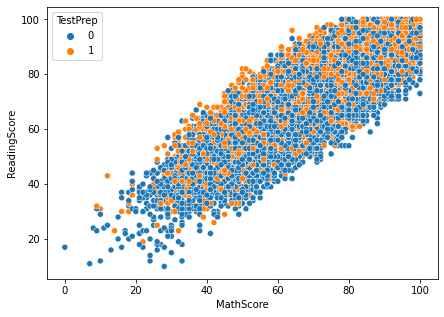

In [56]:
# TestPrep : none=0 , completed=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='MathScore',y='ReadingScore',hue='TestPrep')
plt.show()

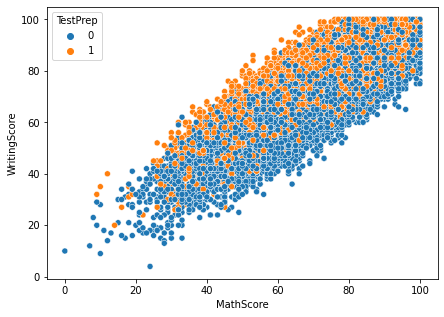

In [57]:
# TestPrep : none=0 , completed=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='MathScore',y='WritingScore',hue='TestPrep')
plt.show()

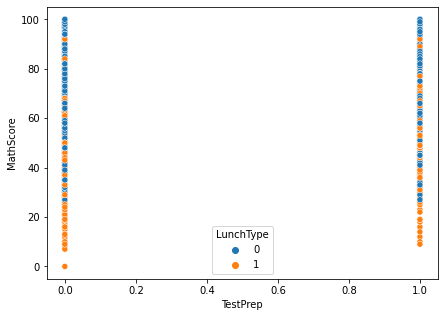

In [58]:
# TestPrep : none=0 , completed=1
# LunchType : standard=0 , free/reduced=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='TestPrep',y='MathScore',hue='LunchType')
plt.show()

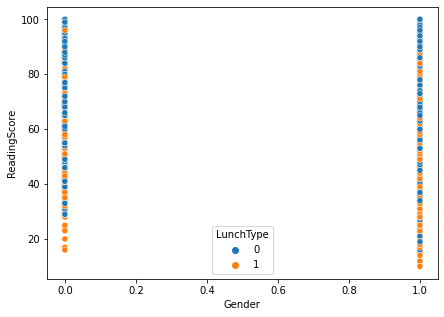

In [59]:
# Gender : female=0 , male=1
# LunchType : standard=0 , free/reduced=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Gender',y='ReadingScore',hue='LunchType')
plt.show()

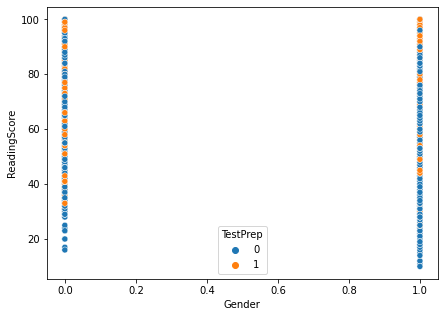

In [60]:
# Gender : female=0 , male=1
# TestPrep : none=0 , completed=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Gender',y='ReadingScore',hue='TestPrep')
plt.show()

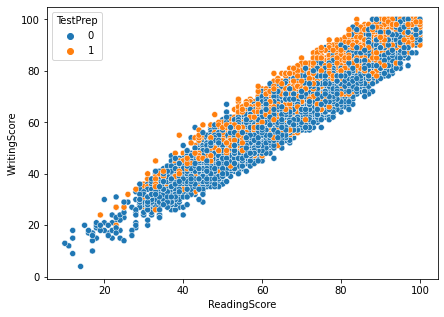

In [61]:
# TestPrep : none=0 , completed=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='ReadingScore',y='WritingScore',hue='TestPrep')
plt.show()

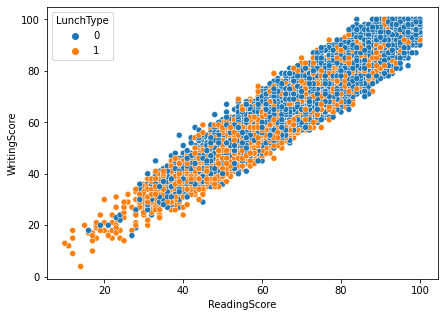

In [62]:
# LunchType : standard=0 , free/reduced=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='ReadingScore',y='WritingScore',hue='LunchType')
plt.show()

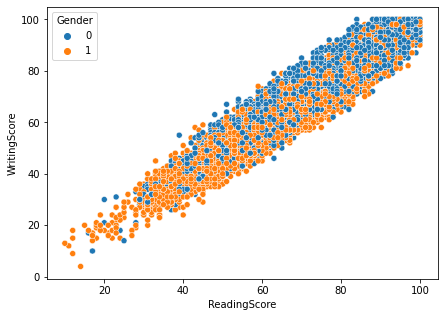

In [63]:
# Gender : female=0 , male=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='ReadingScore',y='WritingScore',hue='Gender')
plt.show()

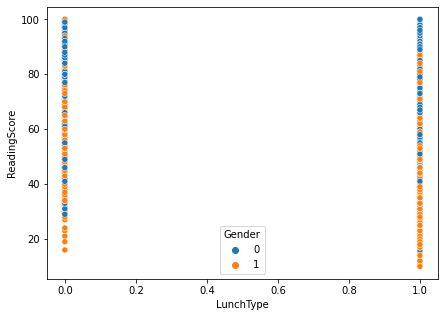

In [64]:
# Gender : female=0 , male=1
# LunchType : standard=0 , free/reduced=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='LunchType',y='ReadingScore',hue='Gender')
plt.show()

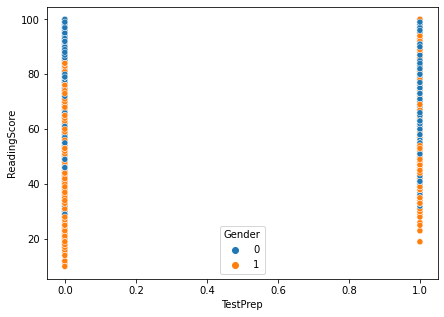

In [65]:
# Gender : female=0 , male=1
# TestPrep : none=0 , completed=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='TestPrep',y='ReadingScore',hue='Gender')
plt.show()

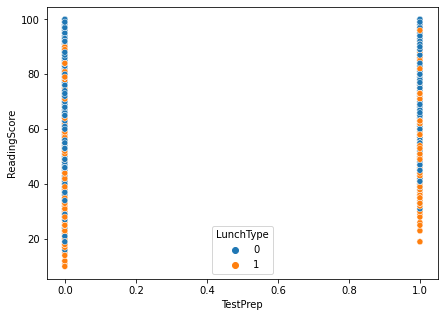

In [66]:
# TestPrep : none=0 , completed=1
# LunchType : standard=0 , free/reduced=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='TestPrep',y='ReadingScore',hue='LunchType')
plt.show()

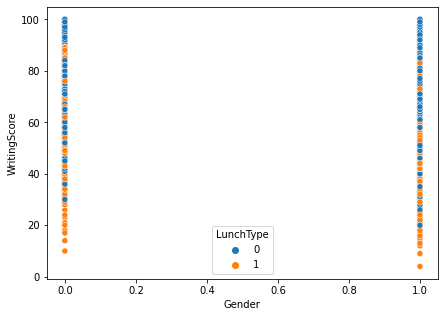

In [67]:
# LunchType : standard=0 , free/reduced=1
# Gender : female=0 , male=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Gender',y='WritingScore',hue='LunchType')
plt.show()

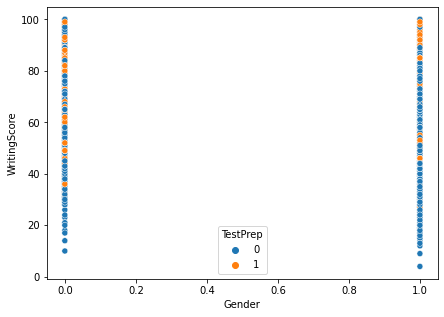

In [68]:
# Gender : female=0 , male=1
# TestPrep : none=0 , completed=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Gender',y='WritingScore',hue='TestPrep')
plt.show()

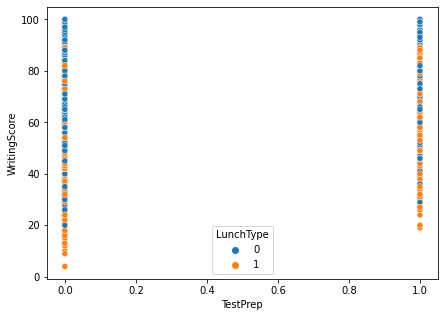

In [69]:
# TestPrep : none=0 , completed=1
# LunchType : standard=0 , free/reduced=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='TestPrep',y='WritingScore',hue='LunchType')
plt.show()

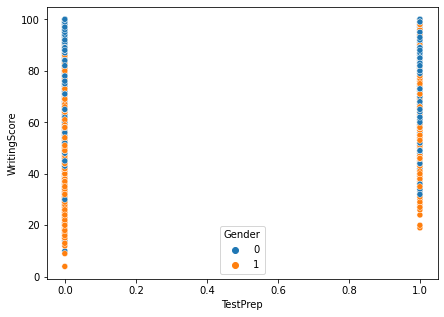

In [70]:
# TestPrep : none=0 , completed=1
# Gender : female=0 , male=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='TestPrep',y='WritingScore',hue='Gender')
plt.show()

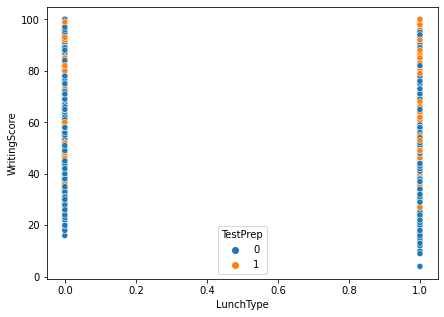

In [71]:
# TestPrep : none=0 , completed=1
# LunchType : standard=0 , free/reduced=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='LunchType',y='WritingScore',hue='TestPrep')
plt.show()

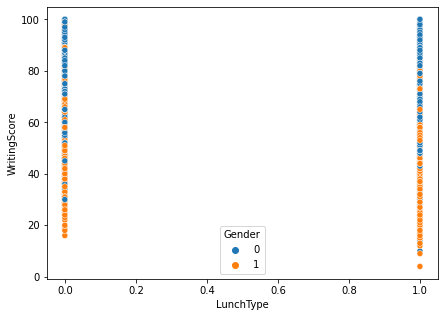

In [72]:
# LunchType : standard=0 , free/reduced=1
# Gender : female=0 , male=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='LunchType',y='WritingScore',hue='Gender')
plt.show()

In [73]:
df['AverageScores']=(df['MathScore']+df['ReadingScore']+df['WritingScore'])/3
df.head()

,Gender,LunchType,TestPrep,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,EthnicGroup_group B,...,ParentEduc_some college,ParentEduc_some high school,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_< 5,WklyStudyHours_> 10,AverageScores
2,0,0,0,0,4.0,0,87,93,91,1,...,0,0,0,1,0,0,1,1,0,90.333333
4,1,0,0,0,0.0,0,76,78,75,0,...,1,0,1,0,0,0,1,0,0,76.333333
5,0,0,0,0,1.0,0,73,84,79,1,...,0,0,1,0,0,1,0,0,0,78.666667
6,0,0,1,1,1.0,1,85,93,89,1,...,1,0,0,0,1,0,0,0,0,89.000000
7,1,1,0,0,1.0,1,41,43,39,1,...,1,0,1,0,0,0,1,0,1,41.000000


In [74]:
df.corr()['AverageScores'].sort_values(ascending=False)

AverageScores                   1.000000
ReadingScore                    0.969418
WritingScore                    0.966542
MathScore                       0.920521
TestPrep                        0.227246
EthnicGroup_group E             0.165762
ParentEduc_master's degree      0.123901
ParentEduc_bachelor's degree    0.110036
EthnicGroup_group D             0.063947
WklyStudyHours_> 10             0.050212
PracticeSport_regularly         0.043111
ParentMaritalStatus_widowed     0.010964
NrSiblings                      0.003266
TransportMeans                  0.001194
ParentMaritalStatus_married    -0.003333
ParentEduc_some college        -0.004455
ParentMaritalStatus_single     -0.004488
IsFirstChild                   -0.007877
PracticeSport_sometimes        -0.014313
WklyStudyHours_< 5             -0.065626
EthnicGroup_group C            -0.067483
ParentEduc_high school         -0.084669
EthnicGroup_group B            -0.091507
Gender                         -0.131637
ParentEduc_some 

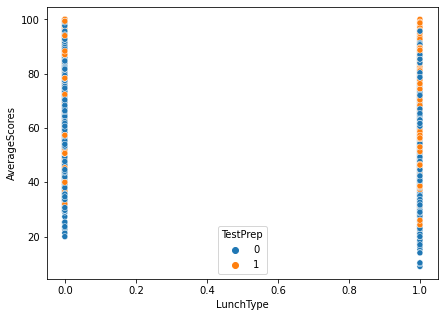

In [75]:
# TestPrep : none=0 , completed=1
# LunchType : standard=0 , free/reduced=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='LunchType',y='AverageScores',hue='TestPrep')
plt.show()

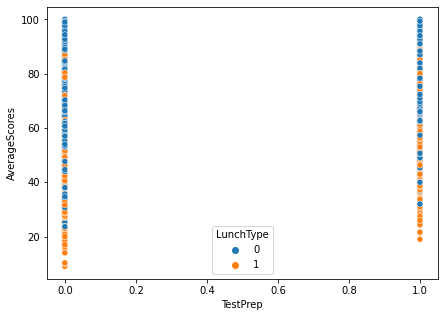

In [76]:
# TestPrep : none=0 , completed=1
# LunchType : standard=0 , free/reduced=1
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='TestPrep',y='AverageScores',hue='LunchType')
plt.show()

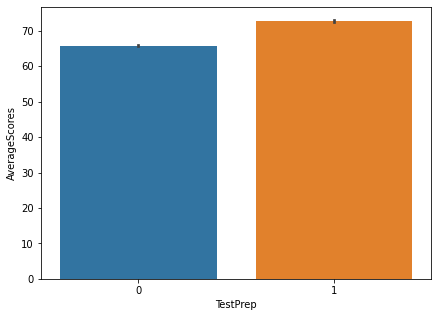

In [77]:
# TestPrep : none=0 , completed=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='TestPrep',y='AverageScores')
plt.show()

In [78]:
df[df['TestPrep']==0]['AverageScores'].mean()

65.83451715278827

In [79]:
df[df['TestPrep']==1]['AverageScores'].mean()

72.75085324232082

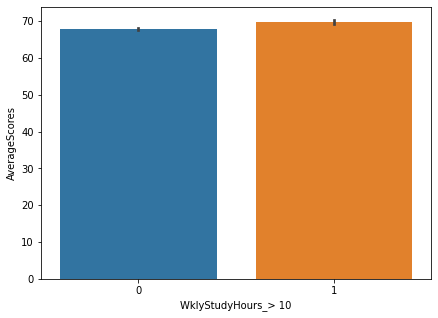

In [80]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='WklyStudyHours_> 10',y='AverageScores')
plt.show()

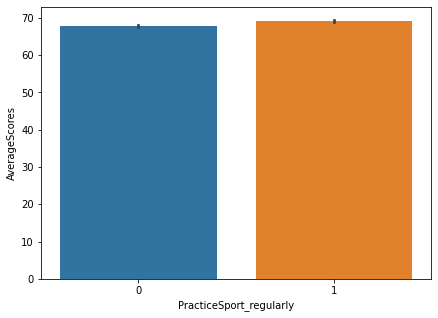

In [81]:
# Practice Sport Regularly : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='PracticeSport_regularly',y='AverageScores')
plt.show()

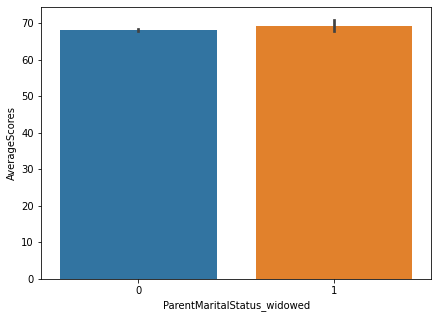

In [82]:
# Widowed : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='ParentMaritalStatus_widowed',y='AverageScores')
plt.show()

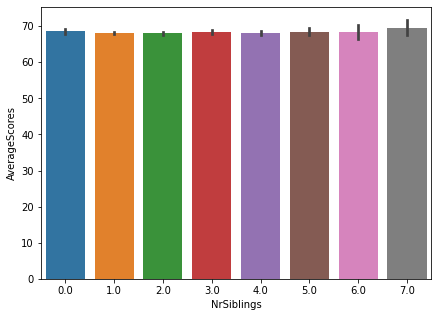

In [83]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='NrSiblings',y='AverageScores')
plt.show()

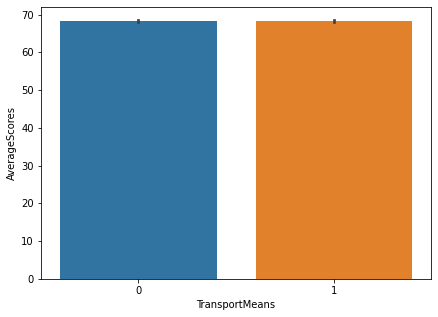

In [84]:
# TransportMeans : school_bus=0 , private=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='TransportMeans',y='AverageScores')
plt.show()

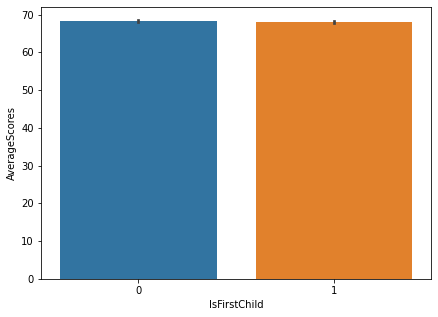

In [85]:
# IsFirstChild : yes=0 , no=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='IsFirstChild',y='AverageScores')
plt.show()

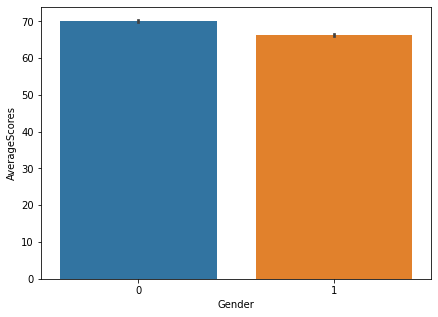

In [86]:
# Gender : female=0 , male=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Gender',y='AverageScores')
plt.show()

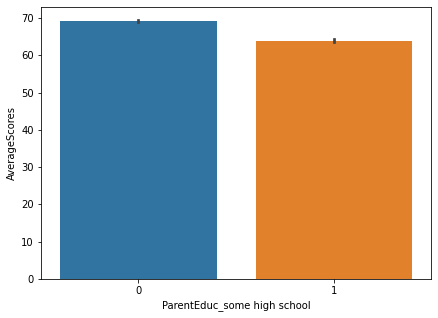

In [87]:
# ParentEduc_some high school : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='ParentEduc_some high school',y='AverageScores')
plt.show()

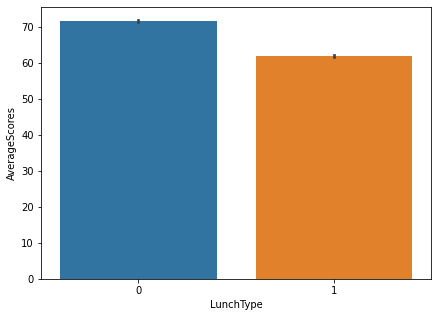

In [88]:
# LunchType : standard=0 , free/reduced=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='LunchType',y='AverageScores')
plt.show()

In [89]:
df[df['LunchType']==0]['AverageScores'].mean()

71.6697655515761

In [90]:
df[df['LunchType']==1]['AverageScores'].mean()

61.92295487423585

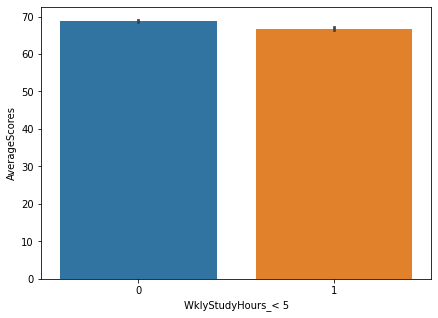

In [91]:
# WklyStudyHours_< 5 : no=0 , yes = 1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='WklyStudyHours_< 5',y='AverageScores')
plt.show()

In [92]:
df.corr()['MathScore'].sort_values(ascending=False)

MathScore                       1.000000
AverageScores                   0.920521
ReadingScore                    0.818753
WritingScore                    0.808485
EthnicGroup_group E             0.227607
Gender                          0.157258
TestPrep                        0.142044
ParentEduc_master's degree      0.099825
ParentEduc_bachelor's degree    0.095464
WklyStudyHours_> 10             0.067409
PracticeSport_regularly         0.050210
EthnicGroup_group D             0.044349
ParentMaritalStatus_widowed     0.012314
ParentMaritalStatus_married     0.004584
NrSiblings                      0.003781
TransportMeans                 -0.002417
ParentEduc_some college        -0.002998
ParentMaritalStatus_single     -0.009402
IsFirstChild                   -0.010478
PracticeSport_sometimes        -0.012502
ParentEduc_high school         -0.072361
WklyStudyHours_< 5             -0.084098
EthnicGroup_group C            -0.086320
EthnicGroup_group B            -0.100594
ParentEduc_some 

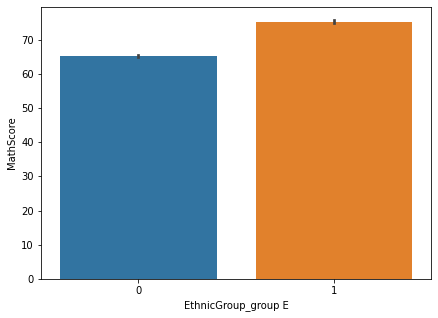

In [93]:
# EthnicGroup_group E : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='EthnicGroup_group E',y='MathScore')
plt.show()

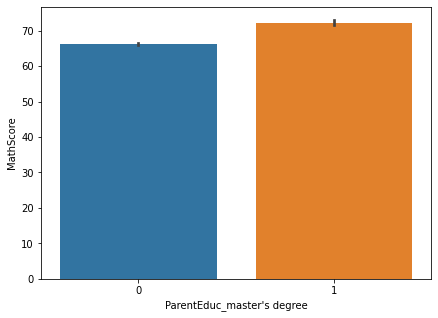

In [94]:
# ParentEduc_master's degree : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x="ParentEduc_master's degree",y="MathScore")
plt.show()

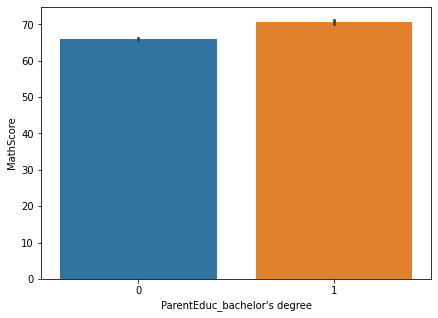

In [95]:
# ParentEduc_bachelor's degree : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x="ParentEduc_bachelor's degree",y="MathScore")
plt.show()

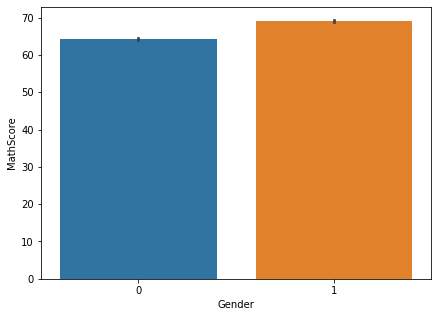

In [96]:
# Gender : female=0 , male=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Gender',y='MathScore')
plt.show()

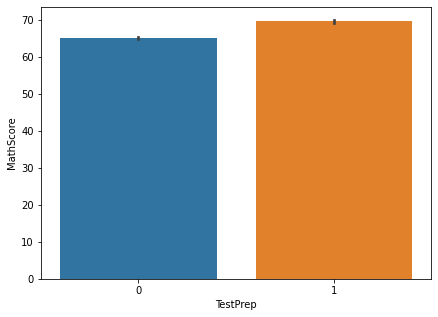

In [97]:
# TestPrep : none=0 , completed=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='TestPrep',y='MathScore')
plt.show()

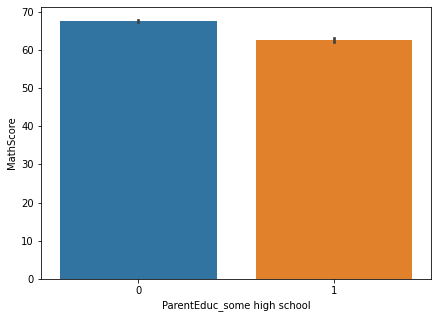

In [98]:
# ParentEduc_some high school : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='ParentEduc_some high school',y='MathScore')
plt.show()

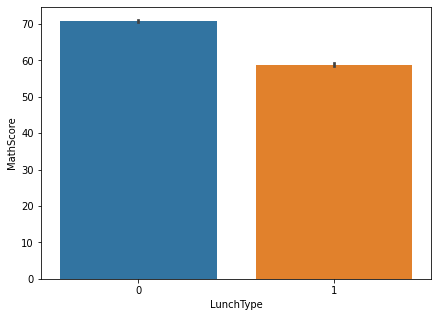

In [99]:
# LunchType : standard=0 , free/reduced=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='LunchType',y='MathScore')
plt.show()

In [100]:
df.corr()['ReadingScore'].sort_values(ascending=False)

ReadingScore                    1.000000
AverageScores                   0.969418
WritingScore                    0.952543
MathScore                       0.818753
TestPrep                        0.212402
EthnicGroup_group E             0.133448
ParentEduc_master's degree      0.116755
ParentEduc_bachelor's degree    0.096340
EthnicGroup_group D             0.041609
WklyStudyHours_> 10             0.032683
PracticeSport_regularly         0.021837
ParentMaritalStatus_widowed     0.010230
TransportMeans                  0.002844
NrSiblings                      0.002351
ParentMaritalStatus_single     -0.003258
ParentMaritalStatus_married    -0.005272
PracticeSport_sometimes        -0.007208
IsFirstChild                   -0.007939
ParentEduc_some college        -0.010456
EthnicGroup_group C            -0.043335
WklyStudyHours_< 5             -0.049506
ParentEduc_high school         -0.072194
EthnicGroup_group B            -0.074470
ParentEduc_some high school    -0.131338
Gender          

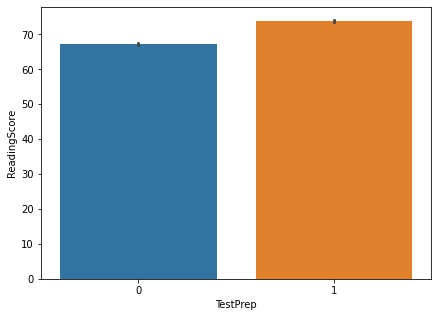

In [101]:
# TestPrep : none=0 , completed=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='TestPrep',y='ReadingScore')
plt.show()

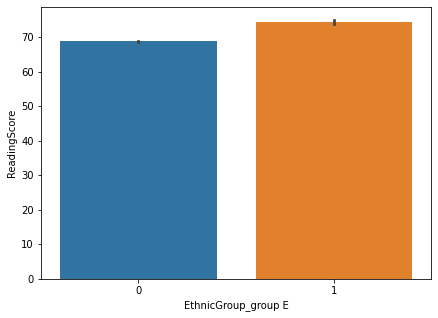

In [102]:
# EthnicGroup_group E : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='EthnicGroup_group E',y='ReadingScore')
plt.show()

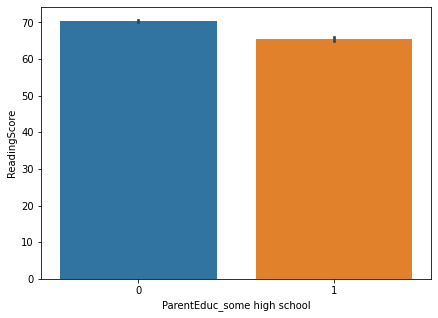

In [103]:
# ParentEduc_some high school : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='ParentEduc_some high school',y='ReadingScore')
plt.show()

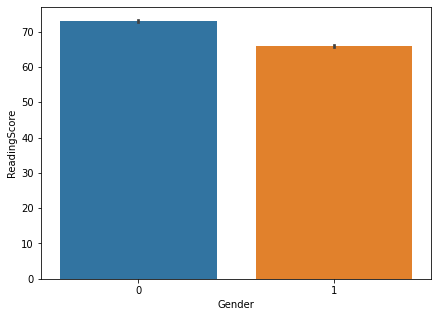

In [104]:
# Gender : female=0 , male = 1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Gender',y='ReadingScore')
plt.show()

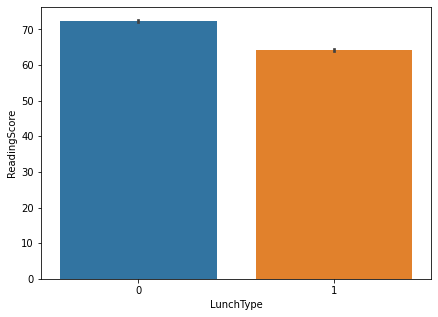

In [105]:
# LunchType : standard=0 , free/reduced=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='LunchType',y='ReadingScore')
plt.show()

In [106]:
df.corr()['WritingScore'].sort_values(ascending=False)

WritingScore                    1.000000
AverageScores                   0.966542
ReadingScore                    0.952543
MathScore                       0.808485
TestPrep                        0.293847
ParentEduc_master's degree      0.137090
ParentEduc_bachelor's degree    0.122008
EthnicGroup_group E             0.111752
EthnicGroup_group D             0.095689
PracticeSport_regularly         0.050282
WklyStudyHours_> 10             0.042772
ParentMaritalStatus_widowed     0.008773
NrSiblings                      0.003167
TransportMeans                  0.003035
ParentEduc_some college         0.000460
ParentMaritalStatus_single     -0.000147
IsFirstChild                   -0.004119
ParentMaritalStatus_married    -0.008870
PracticeSport_sometimes        -0.020872
WklyStudyHours_< 5             -0.053391
EthnicGroup_group C            -0.062291
EthnicGroup_group B            -0.085802
ParentEduc_high school         -0.096819
ParentEduc_some high school    -0.154138
LunchType       

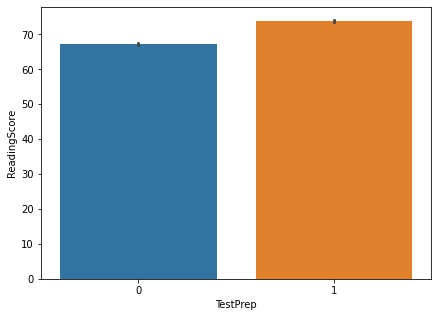

In [107]:
# TestPrep : none=0 , completed=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='TestPrep',y='ReadingScore')
plt.show()

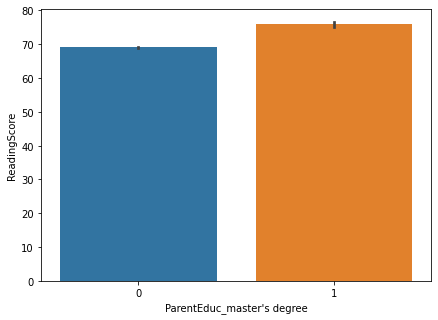

In [108]:
# ParentEduc_master's degree : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x="ParentEduc_master's degree",y="ReadingScore")
plt.show()

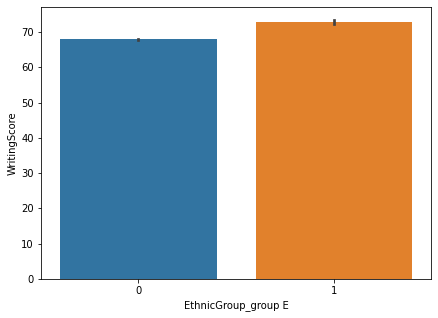

In [109]:
# EthnicGroup_group E : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='EthnicGroup_group E',y='WritingScore')
plt.show()

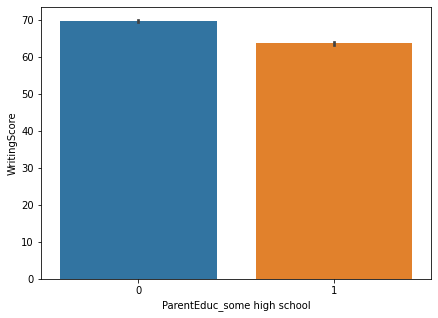

In [110]:
# ParentEduc_some high school : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='ParentEduc_some high school',y='WritingScore')
plt.show()

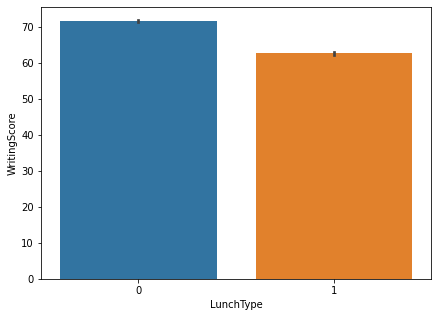

In [111]:
# LunchType : standard=0 , free/reduced=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='LunchType',y='WritingScore')
plt.show()

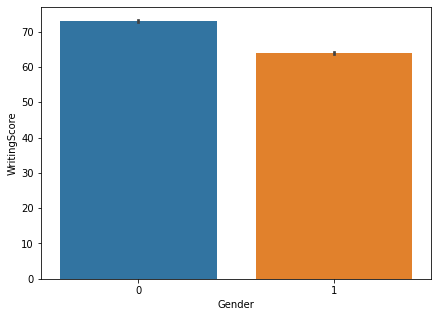

In [112]:
# Gender : female=0 , male=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Gender',y='WritingScore')
plt.show()

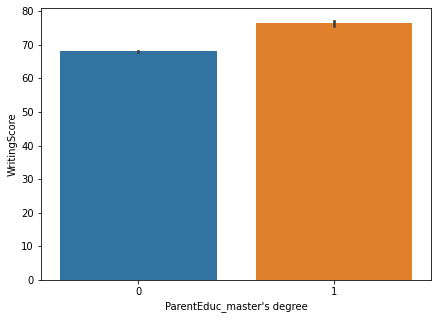

In [113]:
# ParentEduc_master's degree : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x="ParentEduc_master's degree",y="WritingScore")
plt.show()

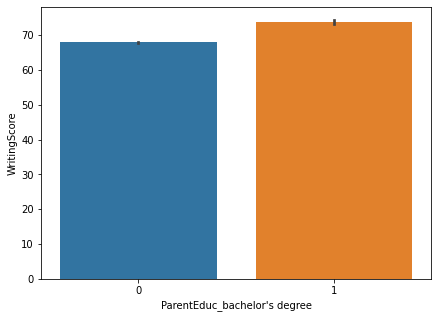

In [114]:
# ParentEduc_bachelor's degree : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.barplot(data=df,x="ParentEduc_bachelor's degree",y="WritingScore")
plt.show()

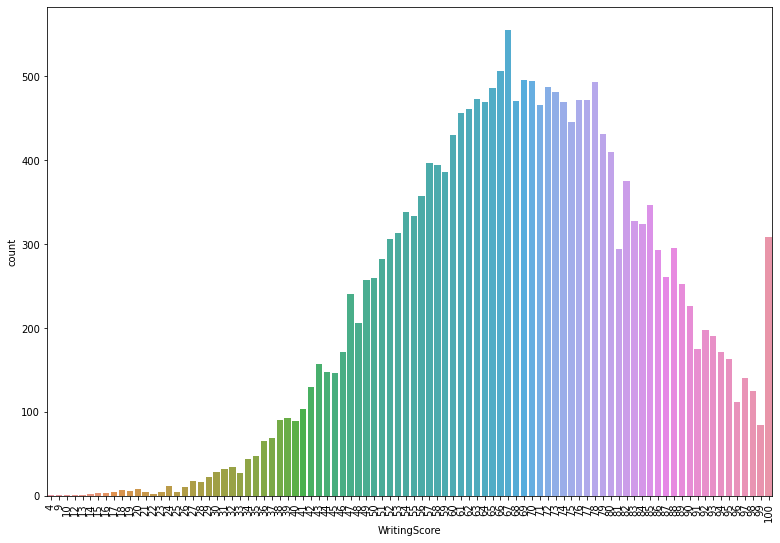

In [115]:
plt.figure(figsize=(13,9))
plt.xticks(rotation=90)
sns.countplot(data=df,x='WritingScore')
plt.show()

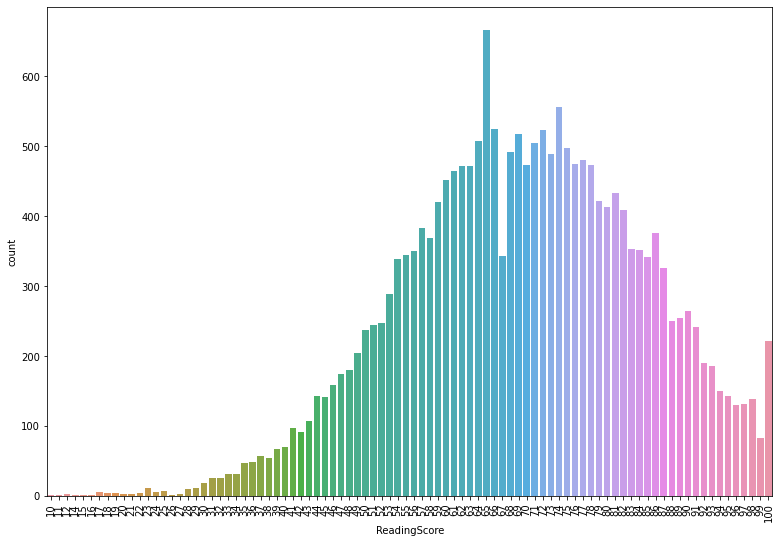

In [116]:
plt.figure(figsize=(13,9))
plt.xticks(rotation=90)
sns.countplot(data=df,x='ReadingScore')
plt.show()

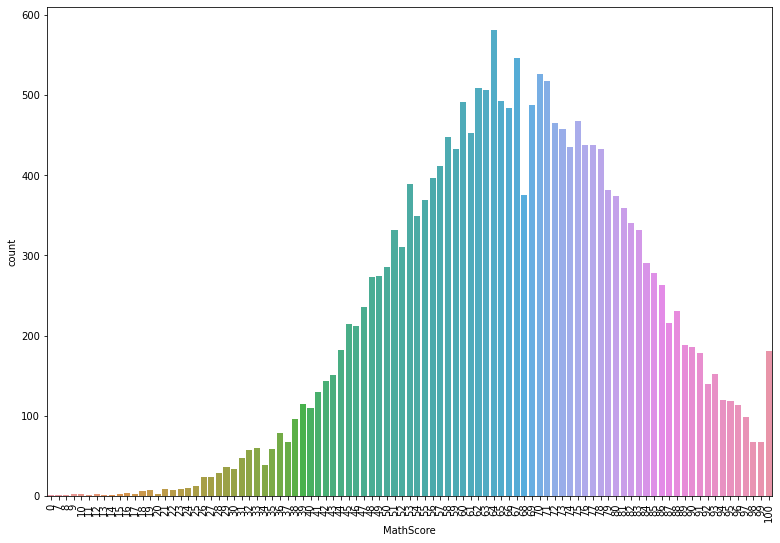

In [117]:
plt.figure(figsize=(13,9))
plt.xticks(rotation=90)
sns.countplot(data=df,x='MathScore')
plt.show()

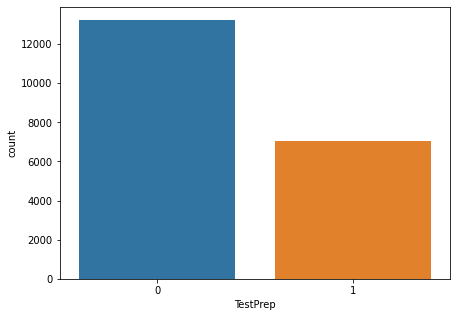

In [118]:
# TestPrep : none=0 , completed=1
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='TestPrep')
plt.show()

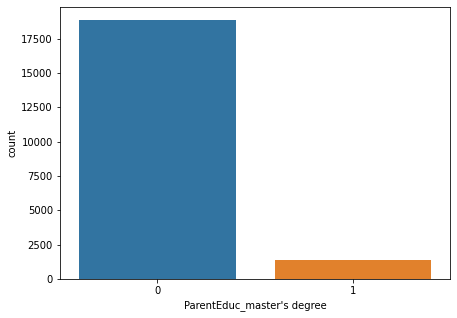

In [119]:
# ParentEduc_master's degree : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.countplot(data=df,x="ParentEduc_master's degree")
plt.show()

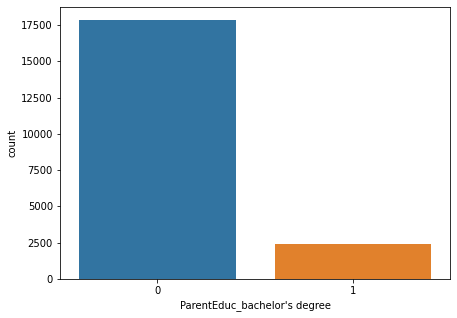

In [120]:
# ParentEduc_bachelor's degree : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.countplot(data=df,x="ParentEduc_bachelor's degree")
plt.show()

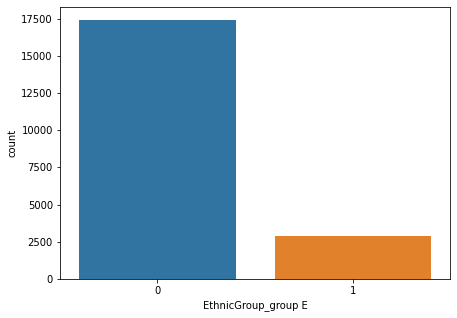

In [121]:
# EthnicGroup_group E : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='EthnicGroup_group E')
plt.show()

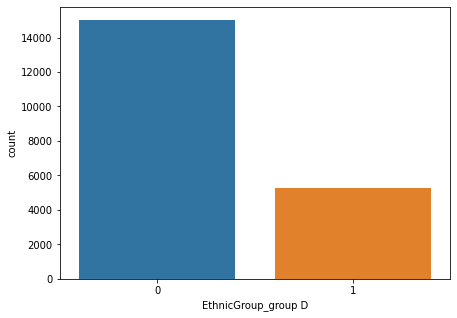

In [122]:
# EthnicGroup_group D : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='EthnicGroup_group D')
plt.show()

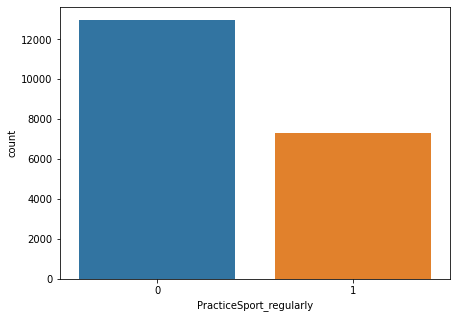

In [123]:
# PracticeSport_regularly : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='PracticeSport_regularly')
plt.show()

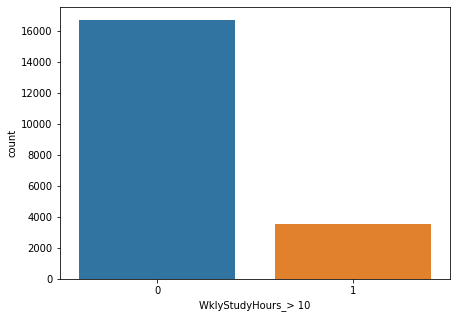

In [124]:
# WklyStudyHours_> 10 : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='WklyStudyHours_> 10')
plt.show()

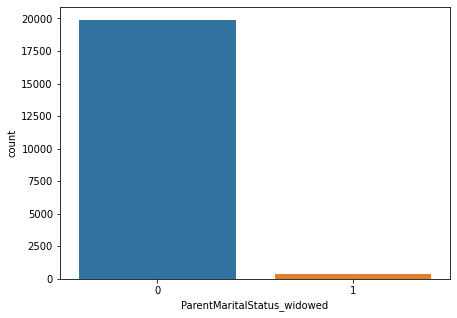

In [125]:
# ParentMaritalStatus_widowed : no=0  yes=1
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='ParentMaritalStatus_widowed')
plt.show()

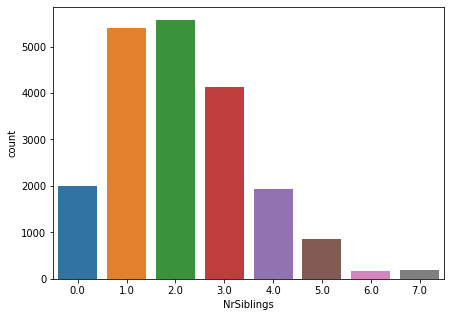

In [126]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='NrSiblings')
plt.show()

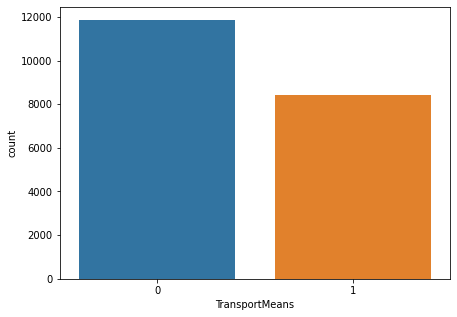

In [127]:
# TransportMeans : school_bus=0 , private=1
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='TransportMeans')
plt.show()

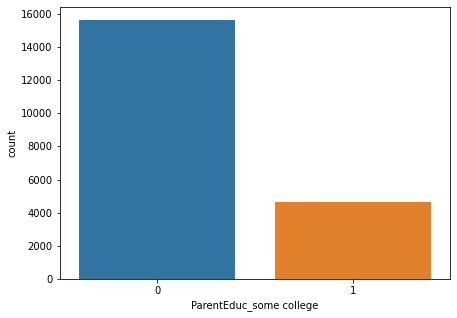

In [128]:
# ParentEduc_some college : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='ParentEduc_some college')
plt.show()

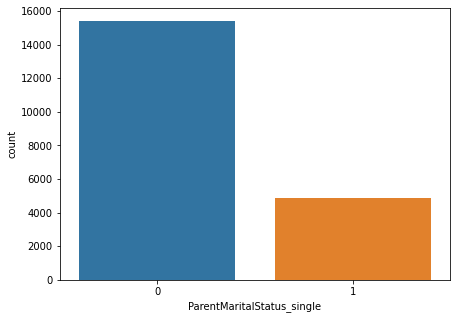

In [129]:
# ParentMaritalStatus_single : no=0  yes=1
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='ParentMaritalStatus_single')
plt.show()

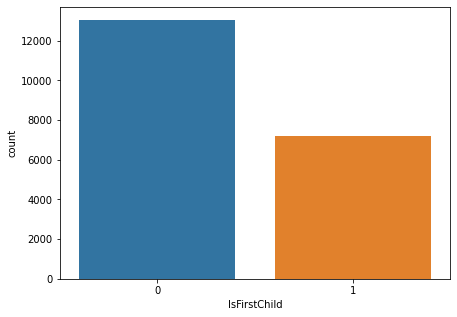

In [130]:
# IsFirstChild : yes=0 , no=1
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='IsFirstChild')
plt.show()

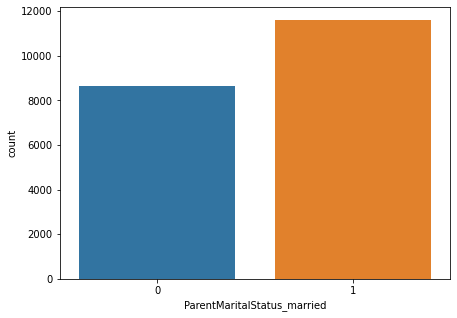

In [131]:
# ParentMaritalStatus_married : no=0  yes=1
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='ParentMaritalStatus_married')
plt.show()

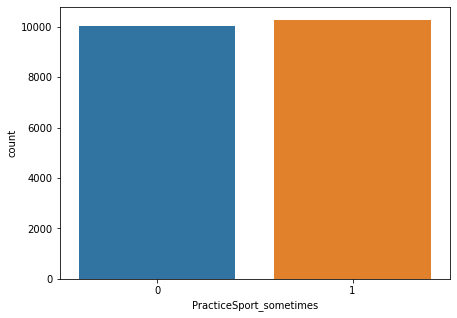

In [132]:
# PracticeSport_sometimes : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='PracticeSport_sometimes')
plt.show()

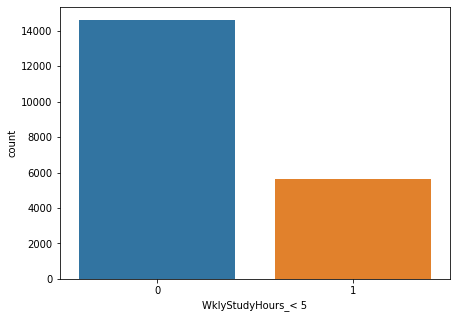

In [133]:
# WklyStudyHours_< 5 : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='WklyStudyHours_< 5')
plt.show()

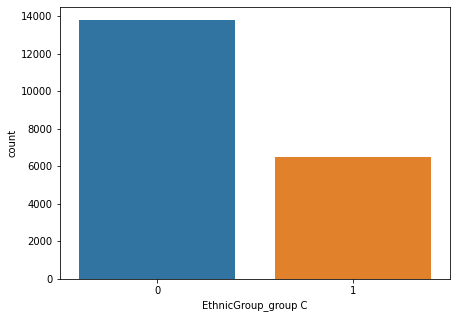

In [134]:
# EthnicGroup_group C : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='EthnicGroup_group C')
plt.show()

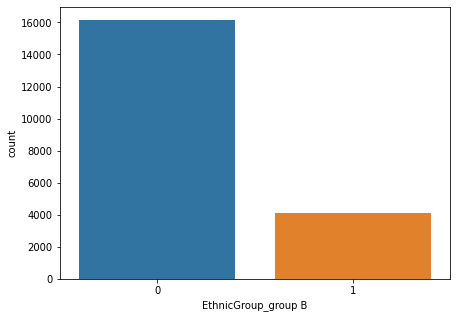

In [135]:
# EthnicGroup_group B : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='EthnicGroup_group B')
plt.show()

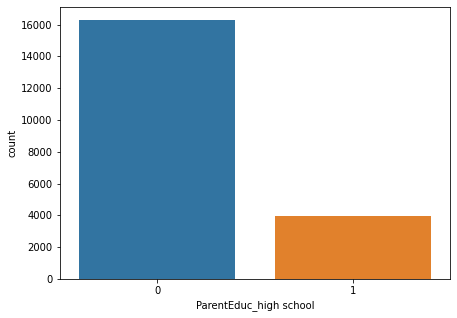

In [136]:
# ParentEduc_high school : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='ParentEduc_high school')
plt.show()

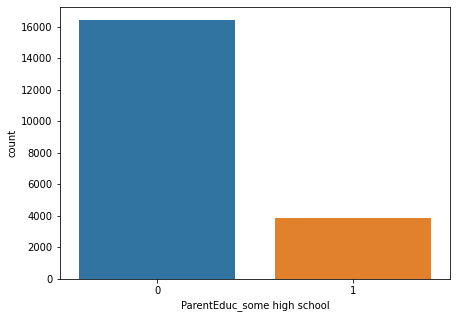

In [137]:
# ParentEduc_some high school : no=0 , yes=1
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='ParentEduc_some high school')
plt.show()

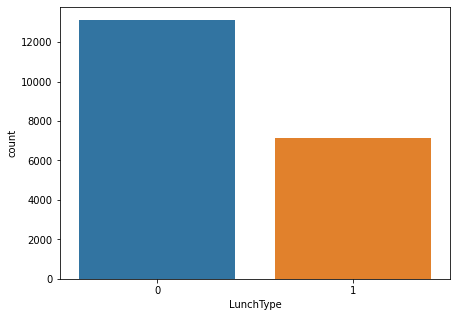

In [138]:
# LunchType : standard=0 , free/reduced=1
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='LunchType')
plt.show()

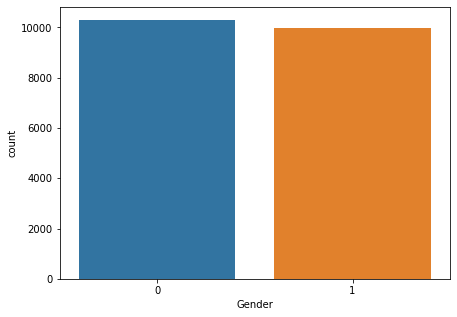

In [139]:
# Gender : female=0 , male=1
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='Gender')
plt.show()

In [140]:
df_copy.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39


In [141]:
df_copy['AverageScores']=(df_copy['MathScore']+df_copy['ReadingScore']+df_copy['WritingScore'])/3
df_copy.sample(4)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,AverageScores
6059,male,group B,some college,standard,none,married,sometimes,no,5.0,private,5 - 10,91,74,75,80.000000
1838,female,group D,some college,free/reduced,none,married,sometimes,yes,2.0,school_bus,5 - 10,63,68,63,64.666667
12366,female,group C,high school,standard,completed,married,regularly,yes,0.0,school_bus,< 5,64,65,69,66.000000
7675,male,group D,high school,standard,completed,married,sometimes,yes,4.0,school_bus,5 - 10,50,57,53,53.333333


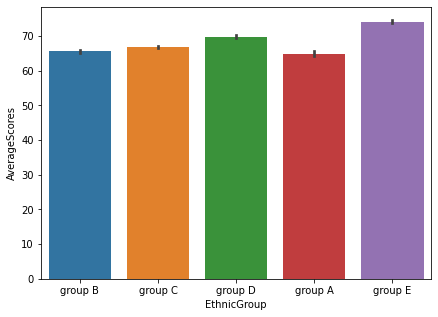

In [142]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy,x='EthnicGroup',y='AverageScores')
plt.show()

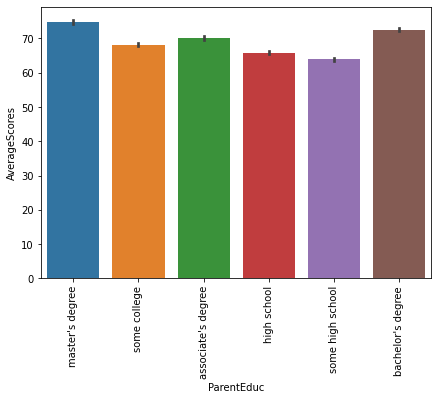

In [143]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sns.barplot(data=df_copy,x='ParentEduc',y='AverageScores')
plt.show()

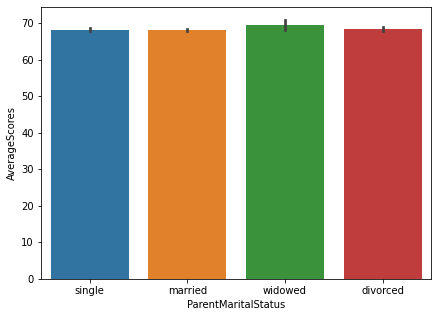

In [144]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy,x='ParentMaritalStatus',y='AverageScores')
plt.show()

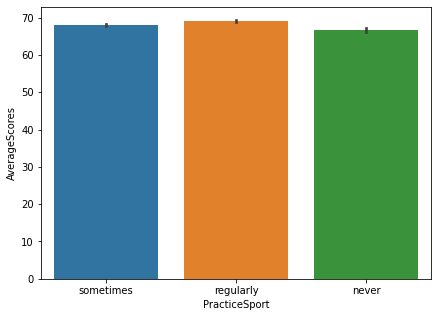

In [145]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy,x='PracticeSport',y='AverageScores')
plt.show()

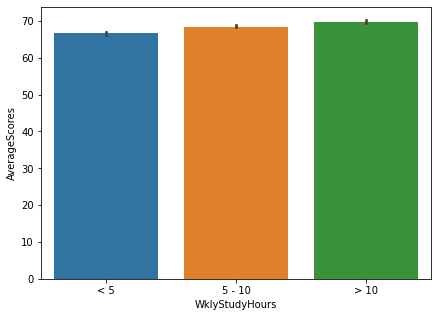

In [146]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy,x='WklyStudyHours',y='AverageScores')
plt.show()

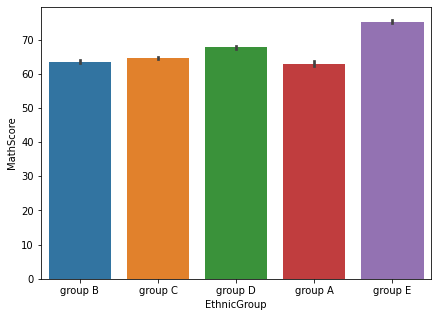

In [147]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy,x='EthnicGroup',y='MathScore')
plt.show()

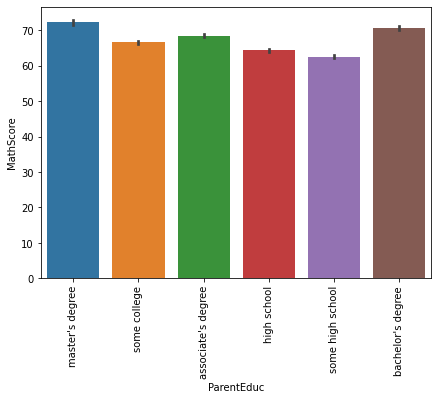

In [148]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sns.barplot(data=df_copy,x='ParentEduc',y='MathScore')
plt.show()

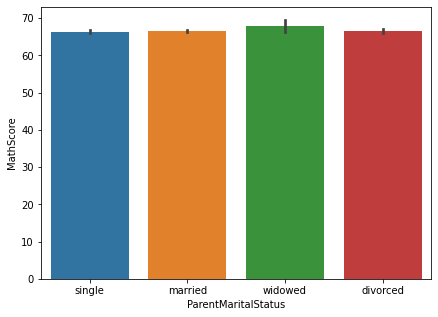

In [149]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy,x='ParentMaritalStatus',y='MathScore')
plt.show()

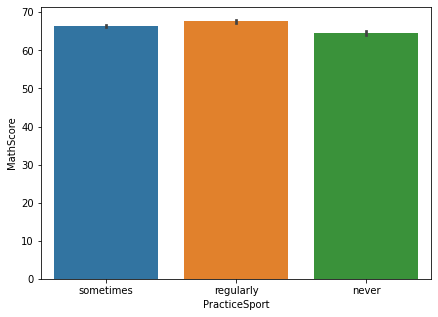

In [150]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy,x='PracticeSport',y='MathScore')
plt.show()

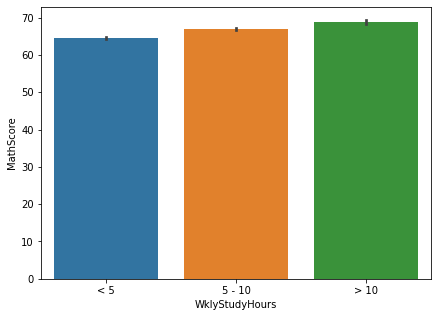

In [151]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy,x='WklyStudyHours',y='MathScore')
plt.show()

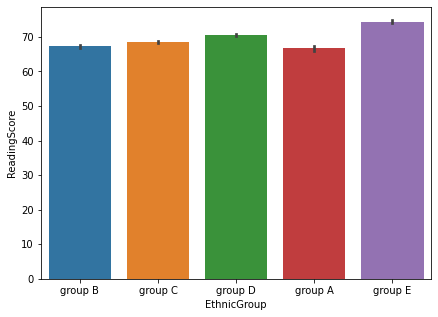

In [152]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy,x='EthnicGroup',y='ReadingScore')
plt.show()

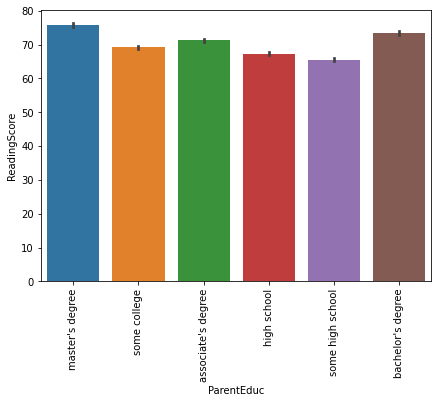

In [153]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sns.barplot(data=df_copy,x='ParentEduc',y='ReadingScore')
plt.show()

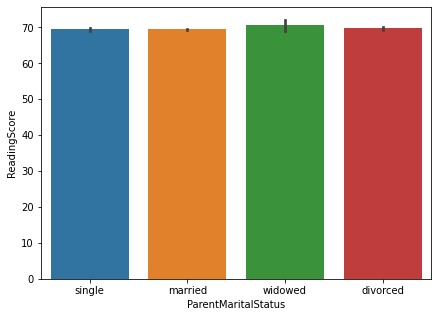

In [154]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy,x='ParentMaritalStatus',y='ReadingScore')
plt.show()

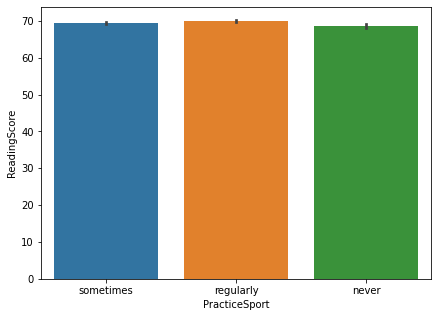

In [155]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy,x='PracticeSport',y='ReadingScore')
plt.show()

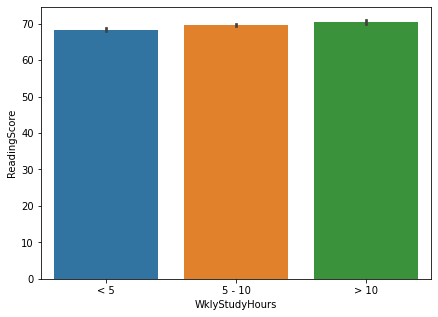

In [156]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy,x='WklyStudyHours',y='ReadingScore')
plt.show()

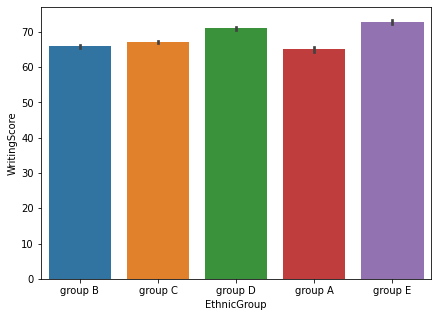

In [157]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy,x='EthnicGroup',y='WritingScore')
plt.show()

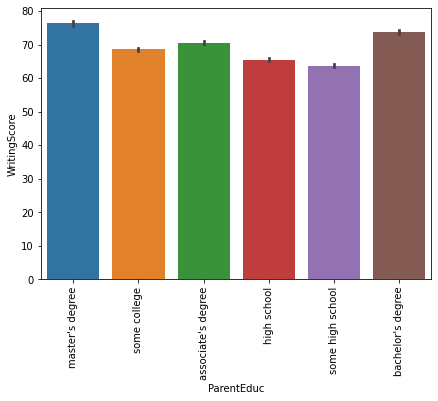

In [158]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sns.barplot(data=df_copy,x='ParentEduc',y='WritingScore')
plt.show()

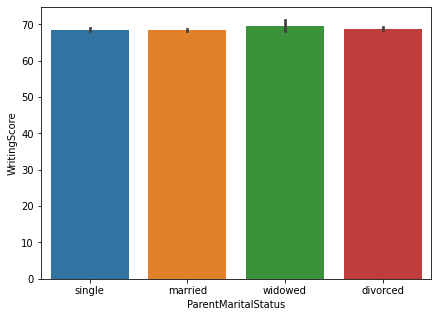

In [159]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy,x='ParentMaritalStatus',y='WritingScore')
plt.show()

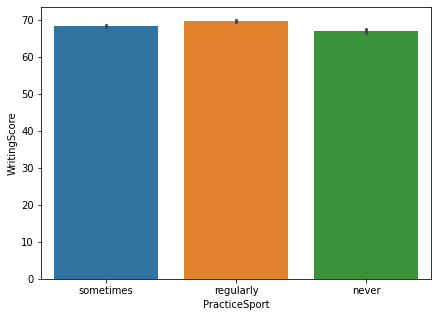

In [160]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy,x='PracticeSport',y='WritingScore')
plt.show()

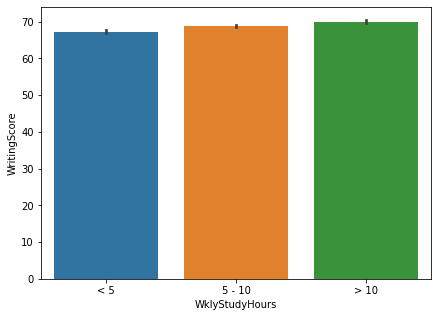

In [161]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy,x='WklyStudyHours',y='WritingScore')
plt.show()

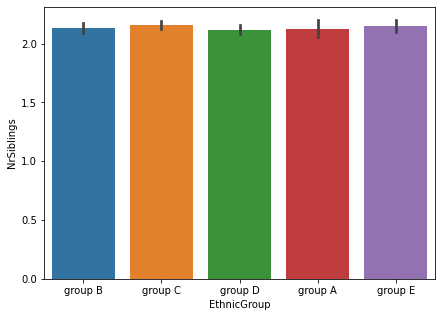

In [162]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy,x='EthnicGroup',y='NrSiblings')
plt.show()

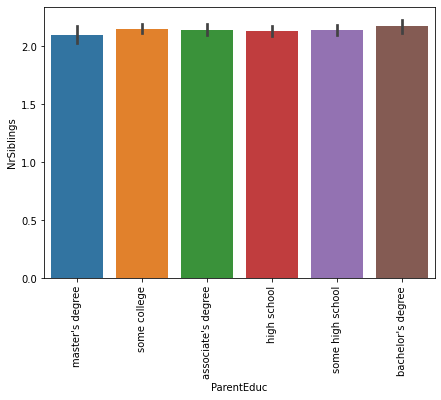

In [163]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sns.barplot(data=df_copy,x='ParentEduc',y='NrSiblings')
plt.show()

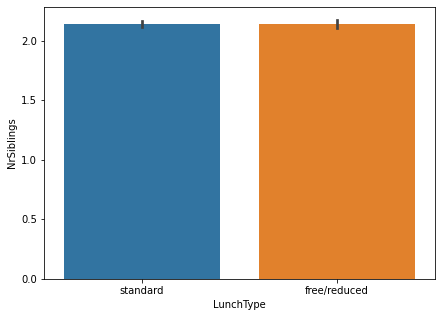

In [164]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy,x='LunchType',y='NrSiblings')
plt.show()

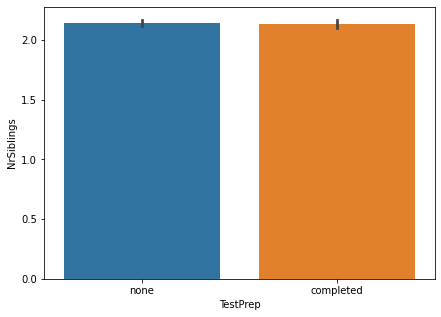

In [165]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy,x='TestPrep',y='NrSiblings')
plt.show()

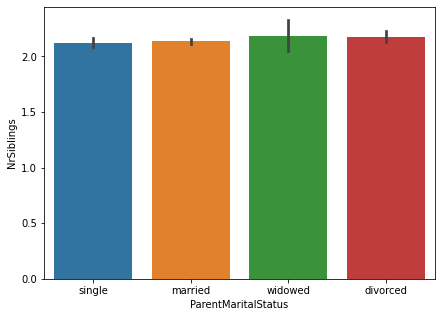

In [166]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_copy,x='ParentMaritalStatus',y='NrSiblings')
plt.show()

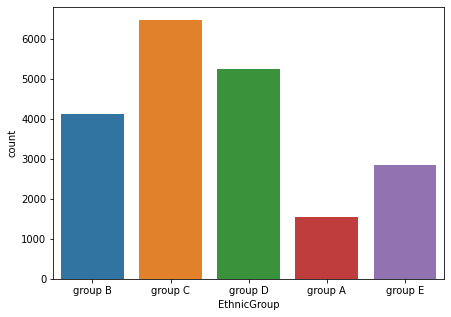

In [167]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_copy,x='EthnicGroup')
plt.show()

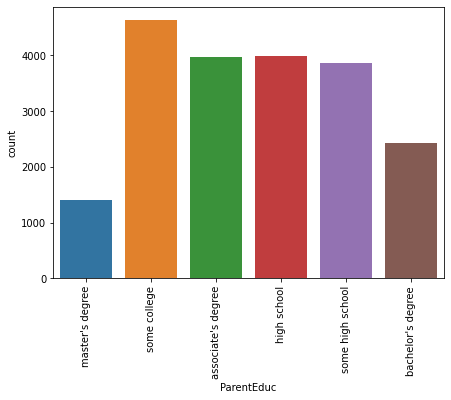

In [168]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sns.countplot(data=df_copy,x='ParentEduc')
plt.show()

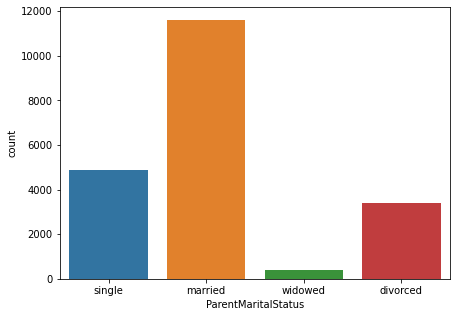

In [169]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_copy,x='ParentMaritalStatus')
plt.show()

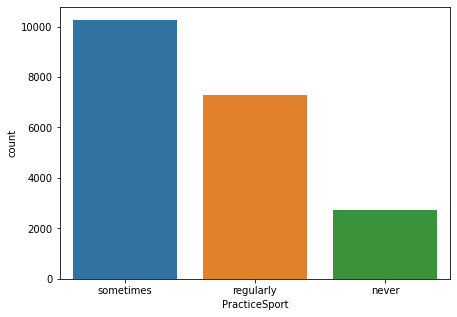

In [170]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_copy,x='PracticeSport')
plt.show()

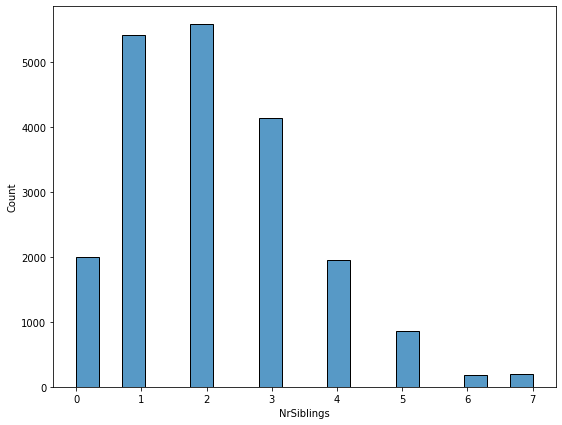

In [171]:
plt.figure(figsize=(9,7))
sns.histplot(data=df_copy,x='NrSiblings',bins=20)
plt.show()

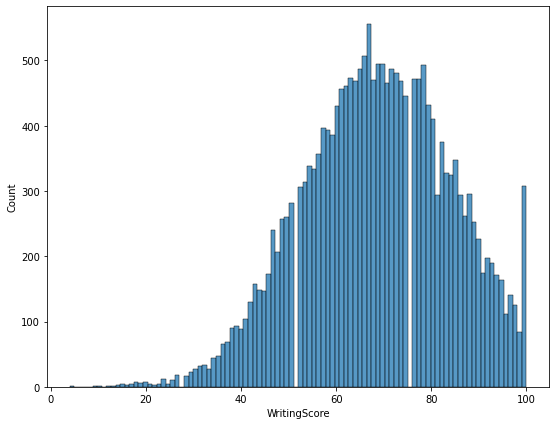

In [172]:
plt.figure(figsize=(9,7))
sns.histplot(data=df,x='WritingScore',bins=100)
plt.show()

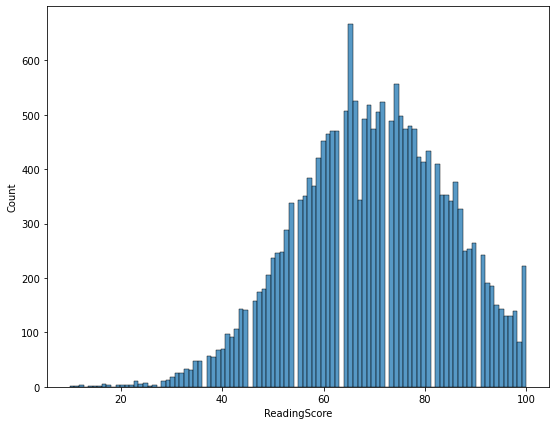

In [173]:
plt.figure(figsize=(9,7))
sns.histplot(data=df_copy,x='ReadingScore',bins=100)
plt.show()

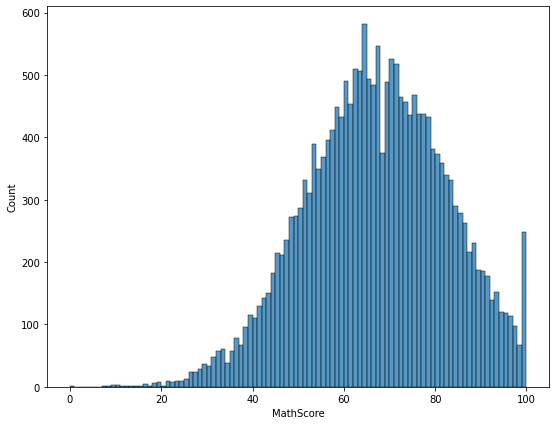

In [174]:
plt.figure(figsize=(9,7))
sns.histplot(data=df_copy,x='MathScore',bins=100)
plt.show()

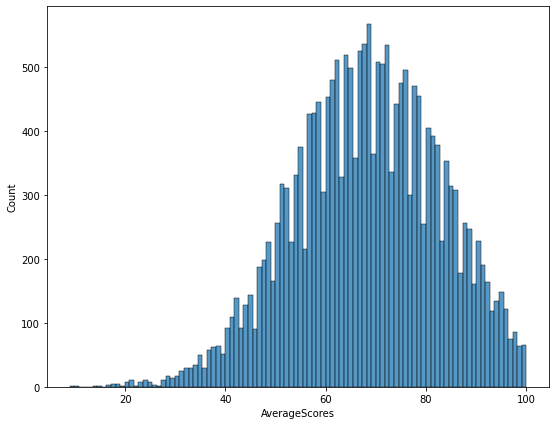

In [175]:
plt.figure(figsize=(9,7))
sns.histplot(data=df,x='AverageScores',bins=100)
plt.show()

In [176]:
df.head()

,Gender,LunchType,TestPrep,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,EthnicGroup_group B,...,ParentEduc_some college,ParentEduc_some high school,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_< 5,WklyStudyHours_> 10,AverageScores
2,0,0,0,0,4.0,0,87,93,91,1,...,0,0,0,1,0,0,1,1,0,90.333333
4,1,0,0,0,0.0,0,76,78,75,0,...,1,0,1,0,0,0,1,0,0,76.333333
5,0,0,0,0,1.0,0,73,84,79,1,...,0,0,1,0,0,1,0,0,0,78.666667
6,0,0,1,1,1.0,1,85,93,89,1,...,1,0,0,0,1,0,0,0,0,89.000000
7,1,1,0,0,1.0,1,41,43,39,1,...,1,0,1,0,0,0,1,0,1,41.000000


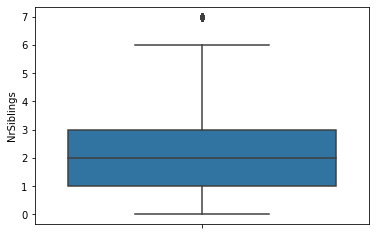

In [177]:
sns.boxplot(data=df,y='NrSiblings')
plt.show()

In [178]:
df.shape

(20266, 26)

In [179]:
df[df['NrSiblings']==7]

,Gender,LunchType,TestPrep,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,EthnicGroup_group B,...,ParentEduc_some college,ParentEduc_some high school,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_< 5,WklyStudyHours_> 10,AverageScores
91,1,0,0,1,7.0,0,79,67,67,1,...,1,0,1,0,0,0,1,0,0,71.000000
441,1,1,1,1,7.0,0,76,69,67,0,...,0,0,1,0,0,1,0,0,1,70.666667
617,0,0,1,0,7.0,1,70,81,77,0,...,0,0,1,0,0,1,0,0,0,76.000000
802,1,0,1,0,7.0,1,91,85,85,0,...,0,0,1,0,0,0,1,0,0,87.000000
868,1,0,1,0,7.0,1,100,100,100,0,...,0,0,0,1,0,1,0,0,0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28284,1,0,0,0,7.0,1,60,57,53,1,...,1,0,1,0,0,0,1,0,0,56.666667
28310,0,0,0,1,7.0,1,75,85,82,0,...,1,0,1,0,0,0,1,0,0,80.666667
28433,0,0,1,1,7.0,0,54,63,67,1,...,0,0,0,0,0,0,1,0,0,61.333333
28835,0,0,0,0,7.0,1,73,86,86,0,...,1,0,1,0,0,1,0,1,0,81.666667


In [180]:
df=df[df['NrSiblings']<7]

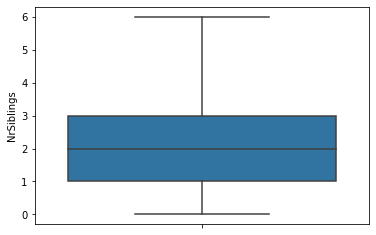

In [181]:
sns.boxplot(data=df,y='NrSiblings')
plt.show()

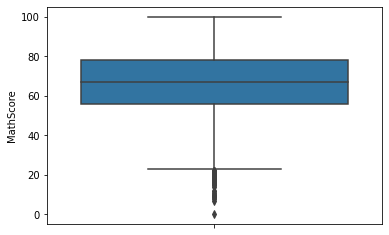

In [182]:
sns.boxplot(data=df,y='MathScore')
plt.show()

In [183]:
df[df['MathScore']<25]

,Gender,LunchType,TestPrep,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,EthnicGroup_group B,...,ParentEduc_some college,ParentEduc_some high school,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_< 5,WklyStudyHours_> 10,AverageScores
17,0,1,0,0,1.0,0,18,32,28,1,...,0,1,0,0,0,0,1,0,0,26.000000
55,0,1,0,0,3.0,0,0,17,10,0,...,0,1,0,1,0,1,0,0,1,9.000000
136,0,1,0,0,1.0,0,21,38,33,0,...,1,0,0,1,0,1,0,1,0,30.666667
319,0,1,0,1,3.0,0,23,37,26,1,...,0,1,0,1,0,0,1,1,0,28.666667
751,0,0,0,1,4.0,1,18,37,32,1,...,1,0,0,1,0,1,0,1,0,29.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28597,0,1,1,0,2.0,0,9,32,32,0,...,0,0,1,0,0,0,1,0,1,24.333333
29000,1,1,0,1,1.0,0,21,18,21,0,...,1,0,1,0,0,0,1,1,0,20.000000
29654,0,1,0,1,4.0,1,19,41,34,1,...,0,0,0,1,0,0,1,0,0,31.333333
29947,0,1,0,1,1.0,1,23,44,38,1,...,1,0,1,0,0,1,0,0,0,35.000000


In [184]:
df=df[df['MathScore']>25]

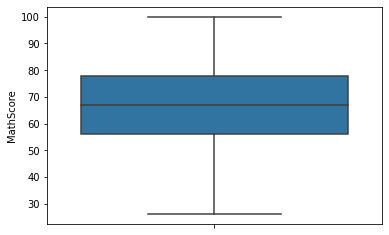

In [185]:
sns.boxplot(data=df,y='MathScore')
plt.show()

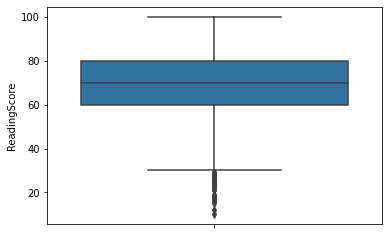

In [186]:
sns.boxplot(data=df,y='ReadingScore')
plt.show()

In [187]:
df[df['ReadingScore']<30]

,Gender,LunchType,TestPrep,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,EthnicGroup_group B,...,ParentEduc_some college,ParentEduc_some high school,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_< 5,WklyStudyHours_> 10,AverageScores
308,1,1,0,0,2.0,0,29,23,19,0,...,1,0,1,0,0,1,0,0,1,23.666667
565,1,1,0,1,2.0,0,30,24,15,1,...,0,0,1,0,0,1,0,0,0,23.000000
570,0,0,0,1,1.0,0,29,29,30,0,...,0,0,0,0,0,0,1,0,0,29.333333
1343,1,1,1,0,0.0,0,42,26,32,0,...,0,1,1,0,0,0,1,0,0,33.333333
1344,1,0,0,1,2.0,1,38,23,27,1,...,0,0,1,0,0,0,1,1,0,29.333333
1484,1,1,0,0,1.0,1,30,21,17,1,...,0,1,0,1,0,0,1,0,1,22.666667
2179,1,0,0,0,0.0,1,35,28,25,0,...,0,0,1,0,0,0,1,0,0,29.333333
3197,1,1,0,0,1.0,0,27,18,15,0,...,0,1,1,0,0,0,0,0,0,20.000000
4083,1,1,0,0,0.0,0,30,25,29,1,...,1,0,0,1,0,1,0,1,0,28.000000
4232,1,1,0,0,3.0,1,30,15,20,1,...,0,0,0,0,0,0,1,0,1,21.666667


In [188]:
df=df[df['ReadingScore']>30]

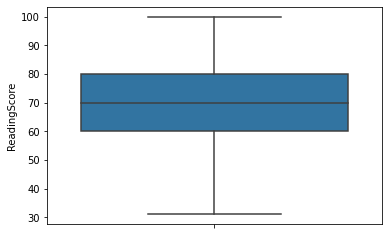

In [189]:
sns.boxplot(data=df,y='ReadingScore')
plt.show()

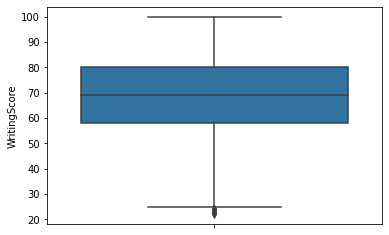

In [190]:
sns.boxplot(data=df,y='WritingScore')
plt.show()

In [191]:
df[df['WritingScore']<25]

,Gender,LunchType,TestPrep,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,EthnicGroup_group B,...,ParentEduc_some college,ParentEduc_some high school,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_< 5,WklyStudyHours_> 10,AverageScores
4474,1,1,0,1,1.0,0,31,40,24,1,...,0,1,1,0,0,1,0,1,0,31.666667
9593,1,1,0,0,2.0,1,41,34,24,0,...,0,1,0,1,0,0,1,1,0,33.000000
10295,1,0,0,0,2.0,1,26,32,24,0,...,1,0,1,0,0,0,1,0,0,27.333333
10530,1,1,0,0,3.0,1,38,34,23,0,...,0,0,0,0,0,0,0,0,1,31.666667
23437,1,1,0,0,0.0,1,27,34,23,0,...,0,0,1,0,0,0,1,0,0,28.000000
29817,1,1,0,1,1.0,1,33,31,22,0,...,0,0,1,0,0,0,1,0,0,28.666667


In [192]:
df=df[df['WritingScore']>25]

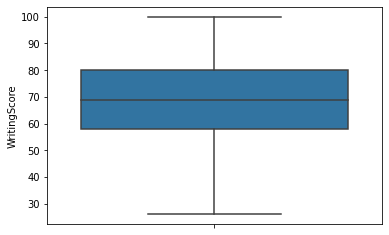

In [193]:
sns.boxplot(data=df,y='WritingScore')
plt.show()

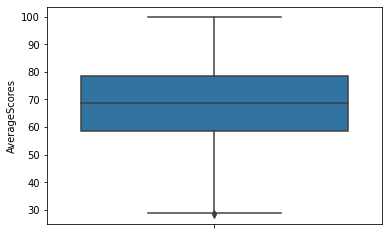

In [194]:
sns.boxplot(data=df,y='AverageScores')
plt.show()

In [195]:
df[df['AverageScores']<29]

,Gender,LunchType,TestPrep,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,EthnicGroup_group B,...,ParentEduc_some college,ParentEduc_some high school,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_< 5,WklyStudyHours_> 10,AverageScores
11966,1,1,0,1,2.0,1,27,32,26,0,...,0,0,0,0,0,0,1,0,0,28.333333


In [196]:
df=df[df['AverageScores']>29]

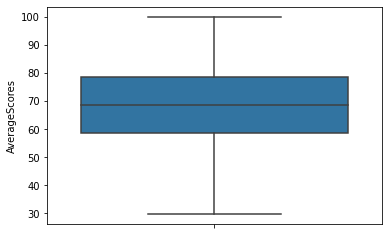

In [197]:
sns.boxplot(data=df,y='AverageScores')
plt.show()

In [198]:
df.shape

(19919, 26)

In [199]:
# Gender : female=0 , male=1
df.groupby(['Gender']).mean()

,LunchType,TestPrep,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,EthnicGroup_group B,EthnicGroup_group C,...,ParentEduc_some college,ParentEduc_some high school,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_< 5,WklyStudyHours_> 10,AverageScores
Gender,,,,,,,,,,,,,,,,,,,,,
0,0.349975,0.352146,0.358263,2.090577,0.418944,64.492057,73.277454,73.279921,0.201480,0.321954,...,0.230192,0.187864,0.561421,0.244499,0.019142,0.363789,0.503897,0.280118,0.172669,70.349811
1,0.348733,0.345155,0.354456,2.099039,0.409853,69.447056,66.244583,64.335037,0.203598,0.316435,...,0.226390,0.189902,0.584935,0.234669,0.019215,0.356807,0.507870,0.277698,0.179170,66.675559


In [200]:
# LunchType : standard=0 , free/reduced=1
df.groupby(['LunchType']).mean()

,Gender,TestPrep,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,EthnicGroup_group B,EthnicGroup_group C,...,ParentEduc_some college,ParentEduc_some high school,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_< 5,WklyStudyHours_> 10,AverageScores
LunchType,,,,,,,,,,,,,,,,,,,,,
0,0.491667,0.348765,0.352932,2.089352,0.414892,70.936651,72.466204,71.852701,0.200926,0.319753,...,0.232330,0.189892,0.575772,0.236034,0.018904,0.357793,0.505324,0.28017,0.177932,71.751852
1,0.490300,0.348613,0.362839,2.104756,0.413709,59.456531,64.900417,63.361834,0.205489,0.318293,...,0.220865,0.186952,0.567754,0.246443,0.019687,0.365139,0.506826,0.27662,0.172007,62.572927


In [201]:
# TestPrep : none=0 , completed=1
df.groupby(['TestPrep']).mean()

,Gender,LunchType,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,EthnicGroup_group B,EthnicGroup_group C,...,ParentEduc_some college,ParentEduc_some high school,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_< 5,WklyStudyHours_> 10,AverageScores
TestPrep,,,,,,,,,,,,,,,,,,,,,
0,0.493872,0.349418,0.355431,2.097510,0.408772,65.429893,67.632313,65.663147,0.200339,0.318816,...,0.226162,0.187698,0.573730,0.237879,0.019965,0.361983,0.502891,0.277577,0.177523,66.241784
1,0.486179,0.349266,0.358192,2.089548,0.425137,69.719983,73.914483,74.906133,0.206594,0.320040,...,0.232364,0.191045,0.571552,0.243018,0.017708,0.357328,0.511373,0.281457,0.172761,72.846866


In [202]:
# IsFirstChild : yes=0 , no=1
df.groupby(['IsFirstChild']).mean()

,Gender,LunchType,TestPrep,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,EthnicGroup_group B,EthnicGroup_group C,...,ParentEduc_some college,ParentEduc_some high school,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_< 5,WklyStudyHours_> 10,AverageScores
IsFirstChild,,,,,,,,,,,,,,,,,,,,,
0,0.492668,0.345866,0.347738,1.972465,0.415679,67.071919,69.941342,68.961232,0.205694,0.316537,...,0.225819,0.191576,0.574649,0.236427,0.019501,0.364743,0.503354,0.279017,0.175039,68.658164
1,0.488520,0.355684,0.350472,2.315537,0.412312,66.662206,69.609241,68.750951,0.196788,0.324130,...,0.232850,0.183970,0.569939,0.245528,0.018594,0.352444,0.510354,0.278772,0.177349,68.340799


In [203]:
df.groupby(['NrSiblings']).mean()

,Gender,LunchType,TestPrep,IsFirstChild,TransportMeans,MathScore,ReadingScore,WritingScore,EthnicGroup_group B,EthnicGroup_group C,...,ParentEduc_some college,ParentEduc_some high school,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_< 5,WklyStudyHours_> 10,AverageScores
NrSiblings,,,,,,,,,,,,,,,,,,,,,
0.0,0.483561,0.338392,0.360647,0.000000,0.415781,67.109256,70.174001,69.288316,0.198786,0.318665,...,0.230653,0.187658,0.569044,0.229135,0.021244,0.385938,0.479009,0.286798,0.167425,68.857191
1.0,0.499067,0.353117,0.341359,0.392311,0.413960,66.956140,69.776409,68.791713,0.210526,0.310377,...,0.227510,0.189063,0.573348,0.247294,0.016051,0.361889,0.509705,0.276222,0.173759,68.508088
2.0,0.488797,0.348211,0.353813,0.402421,0.404228,66.707083,69.660101,68.688471,0.198591,0.318034,...,0.226419,0.186122,0.576437,0.243404,0.021503,0.351283,0.518612,0.281171,0.182147,68.351885
3.0,0.480000,0.347073,0.346098,0.398537,0.419268,67.117073,69.950976,69.125610,0.195610,0.332927,...,0.228780,0.192927,0.569024,0.238537,0.018780,0.366098,0.495854,0.274146,0.178537,68.731220
4.0,0.493769,0.346833,0.349948,0.390966,0.424714,66.713396,69.790239,68.873832,0.207684,0.315161,...,0.244548,0.194185,0.580478,0.231568,0.018692,0.349948,0.509346,0.280893,0.160955,68.459155
5.0,0.512367,0.376914,0.355713,0.388693,0.425206,67.111896,69.891637,68.771496,0.197880,0.327444,...,0.213192,0.170789,0.564193,0.216726,0.023557,0.351001,0.492344,0.288575,0.179034,68.591676
6.0,0.542857,0.342857,0.291429,0.302857,0.462857,67.805714,69.462857,68.582857,0.251429,0.320000,...,0.171429,0.217143,0.548571,0.234286,0.011429,0.337143,0.548571,0.245714,0.222857,68.617143


In [204]:
# TransportMeans : school_bus=0 , private=1
df.groupby(['TransportMeans']).mean()

,Gender,LunchType,TestPrep,IsFirstChild,NrSiblings,MathScore,ReadingScore,WritingScore,EthnicGroup_group B,EthnicGroup_group C,...,ParentEduc_some college,ParentEduc_some high school,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_< 5,WklyStudyHours_> 10,AverageScores
TransportMeans,,,,,,,,,,,,,,,,,,,,,
0,0.495070,0.349824,0.342365,0.357712,2.084627,66.961588,69.807940,68.859127,0.206036,0.314242,...,0.229272,0.186230,0.573094,0.239218,0.019206,0.360027,0.507588,0.285604,0.172426,68.542885
1,0.485707,0.348716,0.357679,0.354530,2.109012,66.875484,69.844234,68.924661,0.197553,0.326308,...,0.226986,0.192587,0.572796,0.240310,0.019138,0.360828,0.503391,0.269501,0.180717,68.548127


In [205]:
df.duplicated().sum()

0

In [206]:
df.drop('AverageScores',axis=1,inplace=True)

In [207]:
df.sample(3)

,Gender,LunchType,TestPrep,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,EthnicGroup_group B,...,ParentEduc_master's degree,ParentEduc_some college,ParentEduc_some high school,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_< 5,WklyStudyHours_> 10
15576,0,0,0,0,3.0,1,67,73,70,0,...,0,0,0,1,0,0,0,1,0,0
8719,0,1,0,0,0.0,1,65,81,80,1,...,0,0,0,1,0,0,1,0,1,0
17709,1,0,1,0,2.0,1,51,50,49,0,...,0,0,0,0,0,0,0,1,1,0


In [208]:
cols_to_scale=['NrSiblings','ReadingScore','WritingScore']
scaler=MinMaxScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [209]:
X=df.drop('MathScore',axis=1)
y=df['MathScore']

In [210]:
X.head()

,Gender,LunchType,TestPrep,IsFirstChild,NrSiblings,TransportMeans,ReadingScore,WritingScore,EthnicGroup_group B,EthnicGroup_group C,...,ParentEduc_master's degree,ParentEduc_some college,ParentEduc_some high school,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_< 5,WklyStudyHours_> 10
2,0,0,0,0,0.666667,0,0.898551,0.878378,1,0,...,1,0,0,0,1,0,0,1,1,0
4,1,0,0,0,0.000000,0,0.681159,0.662162,0,1,...,0,1,0,1,0,0,0,1,0,0
5,0,0,0,0,0.166667,0,0.768116,0.716216,1,0,...,0,0,0,1,0,0,1,0,0,0
6,0,0,1,1,0.166667,1,0.898551,0.851351,1,0,...,0,1,0,0,0,1,0,0,0,0
7,1,1,0,0,0.166667,1,0.173913,0.175676,1,0,...,0,1,0,1,0,0,0,1,0,1


In [211]:
y.head()

2    87
4    76
5    73
6    85
7    41
Name: MathScore, dtype: int64

In [212]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [213]:
X_train.shape

(15935, 24)

In [214]:
X_test.shape

(3984, 24)

In [215]:
model=GradientBoostingRegressor()

In [216]:
param_grid={'n_estimators':[60,80,120],'learning_rate':[0.001,0.01,1],'max_depth':[1,2,4,8]}
grid=GridSearchCV(estimator=model,param_grid=param_grid)

In [217]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 1],
                         'max_depth': [1, 2, 4, 8],
                         'n_estimators': [60, 80, 120]})

In [218]:
grid.best_params_

{'learning_rate': 1, 'max_depth': 1, 'n_estimators': 120}

In [219]:
y_pred=grid.predict(X_test)
y_pred[:5]

array([83.98007068, 78.5701847 , 90.34172692, 84.05083949, 57.78621851])

In [220]:
y_test[:5]

3398     81
25439    71
16630    98
13575    85
21615    51
Name: MathScore, dtype: int64

In [221]:
MAE=mean_absolute_error(y_pred,y_test)
MAE

4.416640467447678

In [222]:
RMSE=np.sqrt(mean_squared_error(y_pred,y_test))
RMSE

5.531904591051989

In [223]:
r2=r2_score(y_pred,y_test)
r2

0.8450469356649967